# Model Testing and Creation - Factor Influencing 


After EDA, now we will compare which model is best and  based on it we will create ML model. 




* Objective: 
   - To see the which model outperform all.
   - To see which model outperform with different balacing dataset, Tackling data leakage
  

* Target-  Plan to study aborad

In [5]:
#Print system version
!jupyter --version
import sys
print("Python version:", sys.version)

Selected Jupyter core packages...
IPython          : 8.12.0
ipykernel        : 6.22.0
ipywidgets       : 8.0.6
jupyter_client   : 8.2.0
jupyter_core     : 5.3.0
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : 0.7.3
nbconvert        : 7.3.1
nbformat         : 5.8.0
notebook         : 6.4.8
qtconsole        : not installed
traitlets        : 5.9.0
Python version: 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:12:31) [Clang 14.0.6 ]


In [114]:
# importing necessary libraries

import pandas as pd # for data manipulation and analysis
import collections # for creating and manipulating Python's collections like OrderedDict, defaultdict, Counter, etc.
import numpy as np # for scientific computing with Python
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns # for advanced visualization

# For Statistical testing
from scipy.stats import ttest_ind # for computing t-test for two independent samples
import statsmodels.api as sm # for statistical models and tests
from scipy.stats import chi2_contingency # for computing chi-square statistic and p-value for a contingency table
import scipy.stats as stats # for implementing skewness and other stats
from scipy.stats import skew # for skewness
from sklearn.metrics import cohen_kappa_score # for computing Cohen's kappa score for inter-rater agreeme


# For Feature Selection 
from sklearn.ensemble import ExtraTreesClassifier  # Extremely Randomized Trees.
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE #Recursive Feature Elimination (RFE)
from sklearn.feature_selection import mutual_info_classif # Mutual Score
from sklearn.linear_model import Lasso # Lasso Regularization
from sklearn.preprocessing import StandardScaler # for scalling


# from sklearn.linear_model import LogisticRegression # Importing Classifier Step
# # Import imbalace technique algorithims

# from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
# from imblearn.over_sampling import SMOTE, ADASYN
# from imblearn.under_sampling import RandomUnderSampler

# from collections import Counter # counter takes values returns value_counts dictionary




# Classifier Libraries 
from sklearn.linear_model import LogisticRegression # for implementing logistic regression algorithm
from sklearn.tree import DecisionTreeClassifier # for implementing decision tree algorithm
from sklearn.ensemble import RandomForestClassifier # for implementing random forest algorithm
from sklearn.svm import SVC # for implementing Support Vector Machine (SVM) algorithm
from sklearn.naive_bayes import GaussianNB # for implementing Naive Bayes algorithm
from sklearn.neighbors import KNeighborsClassifier # for implementing K-Nearest Neighbors (KNN)  algorithm
from sklearn.datasets import make_classification # for some dataset

# Other Libraries
from sklearn.model_selection import train_test_split # for splitting data into training and testing sets
from sklearn.pipeline import make_pipeline # for building a pipeline of transforms with a final estimator
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline # for building a pipeline with imbalanced datasets
from imblearn.over_sampling import SMOTE,ADASYN # for oversampling imbalanced datasets using Synthetic Minority Over-sampling Technique (SMOTE)
from imblearn.under_sampling import NearMiss # for undersampling imbalanced datasets using NearMiss algorithm
from imblearn.metrics import classification_report_imbalanced # for generating a classification report for imbalanced datasets
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report # for computing various performance metrics for classification models
from collections import Counter # for counting the frequency of elements in a list
from sklearn.model_selection import KFold, StratifiedKFold # for k-fold cross-validation
from sklearn.model_selection import cross_val_score # for evaluating a model using cross-validation
from imblearn.under_sampling import RandomUnderSampler # for undersampling imbalanced datasets
from imblearn.over_sampling import RandomOverSampler # for undersampling imbalanced datasets

import pickle #Export Model



import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 5000) # for setting the maximum number of columns to display in pandas dataframes
pd.set_option('display.max_rows', 5000) # for setting the maximum number of rows to display in pandas dataframes

In [115]:

#   Connecting datset
df= pd.read_csv('cleansurvey.csv')

In [116]:
df.tail()

,Gender,Age,Education Level,Marital Status,Household Males,Household Females,Educated Family Members,Oldest Child?,Younger Siblings,Older Siblings,Mother’s Education,Father’s Education,Parents’ Jobs,Family Income,Part-Time Work?,District,Family Abroad,Abroad Country,Plans to Study Abroad,Reasons for Staying,Target Study Abroad Country,Planned Year Abroad,Study Subject Abroad,Decision Difficulty,AI Tool Usefulness (1-10),Current Country,Study Start Date,Study Subject,Choosing Difficulty,AI Tool Usefulness (1-10).1,Education Quality,Career Prospects,Political Factors,Social Factors,Economic Factors,Safety/Security,University Preference,Language Access,Cultural Exposure,Research Opportunities,Environmental Factors,AI Familiarity,Key AI Factors,Valuable AI Insights,AI Bias Concerns,Trust in AI,Used AI Tools,Additional Comments,Quality Edu Ranking - A,Quality Edu Ranking - B,Career Rank -A,Career Rank -B,Political Rank -A,Political Rank -B,Social Rank -A,Social Rank -B,Economic Rank -A,Economic Rank -B,Safety Rank -A,Safety Rank -B,University Rank -A,University Rank -B,Language Rank -A,Language Rank -B,Cultural Rank -A,Cultural Rank -B,Research Rank -A,Research Rank -B,Environment Rank -A,Environment Rank -B
96,Non-binary,16-20,High School,Divorced,2,4,6,Yes,1,NaN,PhD,Bachelor's Degree,Business,"NPR 80,001 to NPR 1,10,000",No,Kathmandu,No,NaN,No plan to go,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Option B,Option A,Option A,Option B,Option A,Option B,Option B,Option A,Option B,Option B,Option B,Not familiar at all,Accuracy and reliability of the recommendation...,Estimating the total cost of studying and livi...,Neutral,Transparency about the data sources and algori...,None,NaN,NaN,"High tuition fees\n ,Moderate-quality educatio...","Higher paygrade\n ,Strong career prospects and...",NaN,Lower living expenses due to economic challeng...,NaN,NaN,"Lower cost of living in quieter areas\n ,Abund...",NaN,"Lower cost of living in rural areas\n ,Limited...",NaN,"Low crime rates,Efficient emergency services,A...",NaN,"Diverse availability of desired courses\n ,Mod...",No requirement for language proficiency tests ...,NaN,NaN,Limited cultural exposure and diversity on cam...,NaN,Abundant availability of research job opportun...,NaN,Lower cost of living in environmentally divers...
97,Male,21-25,High School,Married,2,2,4,No,NaN,1,High School,Master's Degree,Government Service,"NPR 80,001 to NPR 1,10,000",No,Kanchanpur,No,NaN,No plan to go,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Option A,Option A,Option B,Option A,Option B,Option A,Option B,Option B,Option B,Option B,Option B,Not familiar at all,Accuracy and reliability of the recommendation...,"Choosing a country or region,Selecting a speci...",Somewhat concerned,Explanations of the reasoning behind the recom...,Chat gpt,NaN,"Moderately priced tuition fees\n ,High-quality...",NaN,"Higher paygrade\n ,Strong career prospects and...",NaN,NaN,Higher living expenses due to economic challen...,Access to diverse social networks and communit...,NaN,Limited availability of affordable housing opt...,NaN,"Limited police presence\n ,Inadequate emergenc...",NaN,NaN,"Diverse availability of desired courses\n ,Mod...",NaN,Some level of language barrier may exist makin...,NaN,Limited cultural exposure and diversity on cam...,NaN,Abundant availability of research job opportun...,NaN,Lower cost of living in environmentally divers...
98,Male,21-25,Bachelor's Degree,Single,3,2,5,No,NaN,3,Below High School,Bachelor's Degree,Business,"NPR 30,001 to NPR 60,000",No,Kailali,No,NaN,No plan to go,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Option A,Option A,Option B,Option B,Option B,Option A,Option A,Option A,Option B,Option B,Option B,Moderately familiar,Accuracy and reliability of the recommendations,Selecting a specific university or program,Neutral,User reviews and ratings from other students,NaN,NaN,"High-quality education,Moderately priced tuiti...",NaN,"Higher paygrade\n ,Limited availability of par...",

In [89]:
df_copy = df.copy()

In [90]:
#listing the data shape
df.shape

(101, 70)

In [11]:
# Print the unique values of each column
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("\n")

Unique values in 'Gender':
['Male' 'Female' 'Non-binary']


Unique values in 'Age':
['21-25' '16-20' '26-30' '41-50' '31-40']


Unique values in 'Education Level':
['High School' "Bachelor's Degree" "Master's Degree" 'Below High School']


Unique values in 'Marital Status':
['Single' 'Married' 'Divorced']


Unique values in 'Household Males':
[ 2  4  3  1 12  5  7  6]


Unique values in 'Household Females':
[ 2  3  5  0 10  1  4  7  6]


Unique values in 'Educated Family Members':
[4 3 2 5 9 8 1 6]


Unique values in 'Oldest Child?':
['Yes' 'No']


Unique values in 'Younger Siblings':
['1' nan '3' '2' 'more than 5']


Unique values in 'Older Siblings':
[nan '2' '1' '3' '4' 'more than 5']


Unique values in 'Mother’s Education':
['PCL/+2' 'Illiterate' "Master's Degree" "Bachelor's Degree" 'Secondary'
 'Primary' 'Below High School' 'High School' 'PhD']


Unique values in 'Father’s Education':
["Bachelor's Degree" 'Primary' "Master's Degree" 'Illiterate' 'Secondary'
 'PCL/+2' 'PhD']


Uni

In [12]:
# Dictionary to store the mappings
mappings = {}

# Define consistent mapping for Option A and Option B
consistent_mapping = {'Option A': 0, 'Option B': 1}

# List of columns to apply the consistent mapping
consistent_columns = [
    'Education Quality', 'Career Prospects', 'Political Factors', 
    'Social Factors', 'Economic Factors', 'Safety/Security', 
    'University Preference', 'Language Access', 'Cultural Exposure', 
    'Research Opportunities', 'Environmental Factors'
]

# List of columns to replace
columns_to_replace = df.columns  # Automatically replace all columns in df

# Apply replace to each column and store the mapping
for col in columns_to_replace:
    if df[col].dtype in ['int64', 'float64']:
        # Skip encoding for numerical columns
        continue
    elif col in consistent_columns:
        # Use the consistent mapping for specific columns
        df[col] = df[col].replace(consistent_mapping)
        mappings[col] = consistent_mapping
    else:
        # Generate and apply mapping for other non-numerical columns
        unique_vals = df[col].unique()
        val_map = {val: idx for idx, val in enumerate(unique_vals)}
        mappings[col] = val_map
        df[col] = df[col].replace(val_map)

# New DataFrame with numerical replacements
new_df = df.copy()

# Display the original mappings and the new DataFrame
print("Mappings:")
for col, mapping in mappings.items():
    print(f"{col}: {mapping}")

print("\nNew DataFrame with numerical values:")
print(new_df)

Mappings:
Gender: {'Male': 0, 'Female': 1, 'Non-binary': 2}
Age: {'21-25': 0, '16-20': 1, '26-30': 2, '41-50': 3, '31-40': 4}
Education Level: {'High School': 0, "Bachelor's Degree": 1, "Master's Degree": 2, 'Below High School': 3}
Marital Status: {'Single': 0, 'Married': 1, 'Divorced': 2}
Oldest Child?: {'Yes': 0, 'No': 1}
Younger Siblings: {'1': 0, nan: 1, '3': 2, '2': 3, 'more than 5': 4}
Older Siblings: {nan: 0, '2': 1, '1': 2, '3': 3, '4': 4, 'more than 5': 5}
Mother’s Education: {'PCL/+2': 0, 'Illiterate': 1, "Master's Degree": 2, "Bachelor's Degree": 3, 'Secondary': 4, 'Primary': 5, 'Below High School': 6, 'High School': 7, 'PhD': 8}
Father’s Education: {"Bachelor's Degree": 0, 'Primary': 1, "Master's Degree": 2, 'Illiterate': 3, 'Secondary': 4, 'PCL/+2': 5, 'PhD': 6}
Parents’ Jobs: {'Business': 0, 'Non-Governmental Service': 1, 'Government Service': 2, 'Agriculture': 3, 'Professor': 4, 'manager': 5, 'Officer': 6}
Family Income: {'NPR 60,001 to NPR 80,000': 0, 'NPR 30,001 to NPR

In [13]:
df_copy.head()

,Gender,Age,Education Level,Marital Status,Household Males,Household Females,Educated Family Members,Oldest Child?,Younger Siblings,Older Siblings,Mother’s Education,Father’s Education,Parents’ Jobs,Family Income,Part-Time Work?,District,Family Abroad,Abroad Country,Plans to Study Abroad,Reasons for Staying,Target Study Abroad Country,Planned Year Abroad,Study Subject Abroad,Decision Difficulty,AI Tool Usefulness (1-10),Current Country,Study Start Date,Study Subject,Choosing Difficulty,AI Tool Usefulness (1-10).1,Education Quality,Career Prospects,Political Factors,Social Factors,Economic Factors,Safety/Security,University Preference,Language Access,Cultural Exposure,Research Opportunities,Environmental Factors,AI Familiarity,Key AI Factors,Valuable AI Insights,AI Bias Concerns,Trust in AI,Used AI Tools,Additional Comments,Quality Edu Ranking - A,Quality Edu Ranking - B,Career Rank -A,Career Rank -B,Political Rank -A,Political Rank -B,Social Rank -A,Social Rank -B,Economic Rank -A,Economic Rank -B,Safety Rank -A,Safety Rank -B,University Rank -A,University Rank -B,Language Rank -A,Language Rank -B,Cultural Rank -A,Cultural Rank -B,Research Rank -A,Research Rank -B,Environment Rank -A,Environment Rank -B
0,Male,21-25,High School,Single,2,2,4,Yes,1,NaN,PCL/+2,Bachelor's Degree,Business,"NPR 60,001 to NPR 80,000",Yes,Doti,Yes,Australia,I am already in Abroad,NaN,NaN,NaN,NaN,NaN,NaN,Australia,01/06/2022,Business and Economics,Hard,3.0,Option A,Option B,Option B,Option A,Option A,Option B,Option B,Option B,Option A,Option A,Option A,Moderately familiar,Accuracy and reliability of the recommendations,Choosing a country or region,Neutral,Explanations of the reasoning behind the recom...,NaN,NaN,"Moderately priced tuition fees\n ,High-quality...",NaN,NaN,Abundant availability of part-time job opportu...,NaN,Higher living expenses due to economic challen...,Higher cost of living in socially vibrant urba...,NaN,Access to diverse job opportunities with compe...,NaN,NaN,"Active police presence,Efficient emergency ser...",NaN,Moderately prestige and reputation of universi...,NaN,Different primary language spoken requiring la...,Rich cultural exposure and diversity on campus...,NaN,Abundant research opportunities and resources ...,NaN,Access to clean and sustainable living environ...,NaN
1,Male,21-25,Bachelor's Degree,Single,4,2,3,No,NaN,2,Illiterate,Primary,Non-Governmental Service,"NPR 60,001 to NPR 80,000",Yes,Banke,No,NaN,Yes,NaN,Canada,2026.0,Business and Economics,Hard,8.0,NaN,NaN,NaN,NaN,NaN,Option A,Option A,Option B,Option A,Option A,Option B,Option B,Option A,Option A,Option A,Option A,Slightly familiar,Accuracy and reliability of the recommendation...,"Choosing a country or region,Selecting a speci...",Somewhat concerned,Transparency about the data sources and algori...,NaN,NaN,"High-quality education,Moderately priced tuiti...",NaN,"Higher paygrade\n ,Strong career prospects and...",NaN,NaN,Limited access to civil liberties and freedom ...,Access to diverse social networks and communit...,NaN,Access to diverse job opportunities with compe...,NaN,NaN,"Active police presence,Efficient emergency ser...",NaN,"Diverse availability of desired courses\n ,Mor...",Communication is generally easy due to fluency...,NaN,Rich cultural exposure and diversity on campus...,NaN,Abundant research opportunities and resources ...,NaN,Access to clean and sustainable living environ...,NaN
2,Female,16-20,High School,Single,2,2,2,Yes,1,NaN,Master's Degree,Bachelor's Degree,Non-Governmental Service,"NPR 30,001 to NPR 60,000",No,Kathmandu,No,NaN,Yes,NaN,New Zealand,2025.0,"Humanities (Languages, Literature, History, Ph...",Hard,7.0,NaN,NaN,NaN,NaN,NaN,Option A,Option A,Option B,Option B,Option A,Option B,Option B,Option A,Option B,Option B,Option B,Moderately familiar,Accuracy and reliability of the recommendations,Finding scholarship or financial aid opportuni...,Not very concerned,Endorsements or certifications from reputable ...,NaN,NaN,"Moderately pr

In [14]:
columns_to_drop = [
    'Additional Comments', 'Reasons for Staying', 'Abroad Country', 
     'Decision Difficulty',
    'AI Tool Usefulness (1-10)', 'Current Country', 'Study Start Date', 
    'Choosing Difficulty', 'AI Tool Usefulness (1-10).1','AI Familiarity','Used AI Tools', 'AI Bias Concerns','Valuable AI Insights',
    'AI Familiarity','Trust in AI','Key AI Factors','Study Subject'
]

# Drop the specified columns
updated_df = df.drop(columns=columns_to_drop)

updated_df.head()

,Gender,Age,Education Level,Marital Status,Household Males,Household Females,Educated Family Members,Oldest Child?,Younger Siblings,Older Siblings,Mother’s Education,Father’s Education,Parents’ Jobs,Family Income,Part-Time Work?,District,Family Abroad,Plans to Study Abroad,Target Study Abroad Country,Planned Year Abroad,Study Subject Abroad,Education Quality,Career Prospects,Political Factors,Social Factors,Economic Factors,Safety/Security,University Preference,Language Access,Cultural Exposure,Research Opportunities,Environmental Factors,Quality Edu Ranking - A,Quality Edu Ranking - B,Career Rank -A,Career Rank -B,Political Rank -A,Political Rank -B,Social Rank -A,Social Rank -B,Economic Rank -A,Economic Rank -B,Safety Rank -A,Safety Rank -B,University Rank -A,University Rank -B,Language Rank -A,Language Rank -B,Cultural Rank -A,Cultural Rank -B,Research Rank -A,Research Rank -B,Environment Rank -A,Environment Rank -B
0,0,0,0,0,2,2,4,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,4,2,3,1,1,1,1,1,1,0,0,1,1,1,1,2026.0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0
2,1,1,0,0,2,2,2,0,0,0,2,0,1,1,1,2,1,1,2,2025.0,2,0,0,1,1,0,1,1,0,1,1,1,0,0,2,1,0,1,2,1,1,0,0,1,0,1,1,1,1,1,2,1,1,1
3,0,1,0,0,2,2,4,1,1,2,3,0,0,2,1,2,1,2,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,2,3,0,1,0,0,1,1,2,2,1,0,0,0,0,0,0
4,1,0,1,0,2,3,4,0,2,0,3,0,1,1,0,3,1,1,3,2025.0,2,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,3,0,1,0,0,0,0,1,2,1,0,0,0,0,0,0


In [15]:
filterdf=df_copy.copy()

In [16]:
filterdf.shape

(101, 70)

In [17]:
filterdf.isnull().sum()

Gender                           0
Age                              0
Education Level                  0
Marital Status                   0
Household Males                  0
Household Females                0
Educated Family Members          0
Oldest Child?                    0
Younger Siblings                52
Older Siblings                  49
Mother’s Education               0
Father’s Education               0
Parents’ Jobs                    0
Family Income                    0
Part-Time Work?                  0
District                         0
Family Abroad                    0
Abroad Country                  62
Plans to Study Abroad            0
Reasons for Staying            101
Target Study Abroad Country     58
Planned Year Abroad             58
Study Subject Abroad            58
Decision Difficulty             58
AI Tool Usefulness (1-10)       58
Current Country                 79
Study Start Date                79
Study Subject                   79
Choosing Difficulty 

In [18]:
columns_to_drop = [
    'Additional Comments', 'Reasons for Staying', 'Abroad Country', 
     'Decision Difficulty',
    'AI Tool Usefulness (1-10)', 'Current Country', 'Study Start Date', 
    'Choosing Difficulty', 'AI Tool Usefulness (1-10).1','AI Familiarity','Used AI Tools', 'AI Bias Concerns','Valuable AI Insights',
    'AI Familiarity','Trust in AI','Key AI Factors'
]

# Drop the specified columns
df_copy_filtered = filterdf=df_copy.copy().drop(columns=columns_to_drop)

df_copy_filtered.head()

,Gender,Age,Education Level,Marital Status,Household Males,Household Females,Educated Family Members,Oldest Child?,Younger Siblings,Older Siblings,Mother’s Education,Father’s Education,Parents’ Jobs,Family Income,Part-Time Work?,District,Family Abroad,Plans to Study Abroad,Target Study Abroad Country,Planned Year Abroad,Study Subject Abroad,Study Subject,Education Quality,Career Prospects,Political Factors,Social Factors,Economic Factors,Safety/Security,University Preference,Language Access,Cultural Exposure,Research Opportunities,Environmental Factors,Quality Edu Ranking - A,Quality Edu Ranking - B,Career Rank -A,Career Rank -B,Political Rank -A,Political Rank -B,Social Rank -A,Social Rank -B,Economic Rank -A,Economic Rank -B,Safety Rank -A,Safety Rank -B,University Rank -A,University Rank -B,Language Rank -A,Language Rank -B,Cultural Rank -A,Cultural Rank -B,Research Rank -A,Research Rank -B,Environment Rank -A,Environment Rank -B
0,Male,21-25,High School,Single,2,2,4,Yes,1,NaN,PCL/+2,Bachelor's Degree,Business,"NPR 60,001 to NPR 80,000",Yes,Doti,Yes,I am already in Abroad,NaN,NaN,NaN,Business and Economics,Option A,Option B,Option B,Option A,Option A,Option B,Option B,Option B,Option A,Option A,Option A,"Moderately priced tuition fees\n ,High-quality...",NaN,NaN,Abundant availability of part-time job opportu...,NaN,Higher living expenses due to economic challen...,Higher cost of living in socially vibrant urba...,NaN,Access to diverse job opportunities with compe...,NaN,NaN,"Active police presence,Efficient emergency ser...",NaN,Moderately prestige and reputation of universi...,NaN,Different primary language spoken requiring la...,Rich cultural exposure and diversity on campus...,NaN,Abundant research opportunities and resources ...,NaN,Access to clean and sustainable living environ...,NaN
1,Male,21-25,Bachelor's Degree,Single,4,2,3,No,NaN,2,Illiterate,Primary,Non-Governmental Service,"NPR 60,001 to NPR 80,000",Yes,Banke,No,Yes,Canada,2026.0,Business and Economics,NaN,Option A,Option A,Option B,Option A,Option A,Option B,Option B,Option A,Option A,Option A,Option A,"High-quality education,Moderately priced tuiti...",NaN,"Higher paygrade\n ,Strong career prospects and...",NaN,NaN,Limited access to civil liberties and freedom ...,Access to diverse social networks and communit...,NaN,Access to diverse job opportunities with compe...,NaN,NaN,"Active police presence,Efficient emergency ser...",NaN,"Diverse availability of desired courses\n ,Mor...",Communication is generally easy due to fluency...,NaN,Rich cultural exposure and diversity on campus...,NaN,Abundant research opportunities and resources ...,NaN,Access to clean and sustainable living environ...,NaN
2,Female,16-20,High School,Single,2,2,2,Yes,1,NaN,Master's Degree,Bachelor's Degree,Non-Governmental Service,"NPR 30,001 to NPR 60,000",No,Kathmandu,No,Yes,New Zealand,2025.0,"Humanities (Languages, Literature, History, Ph...",NaN,Option A,Option A,Option B,Option B,Option A,Option B,Option B,Option A,Option B,Option B,Option B,"Moderately priced tuition fees\n ,High-quality...",NaN,"Higher paygrade\n ,Limited availability of par...",NaN,NaN,Limited access to civil liberties and freedom ...,NaN,Abundant opportunities for social interaction\...,Access to diverse job opportunities with compe...,NaN,NaN,"Low crime rates,Efficient emergency services,A...",NaN,"Diverse availability of desired courses\n ,Mor...",Communication is generally easy due to fluency...,NaN,NaN,Limited cultural exposure and diversity on cam...,NaN,"High collaborations with other researchers,Abu...",NaN,Lower cost of living in environmentally divers...
3,Male,16-20,High School,Single,2,2,4,No,NaN,1,Bachelor's Degree,Bachelor's Degree,Business,"NPR 1,10,001 to NPR 2,00,000",No,Kathmandu,No,No plan to go,NaN,NaN,NaN,NaN,Option A,Option A,Option A,Option A,Option A,Option B,Option A,Option A,Option A,Option A,Option A,"High-quality education,Moderately priced tuiti...",NaN,"Higher paygrade\n ,Strong career p

In [19]:
# # Export summary_df to CSV
# summary_df.to_csv('summary chisquare_df22.csv', index=False)




* Education Level: Found to be significant with a p-value of 0.0232.
* Part-Time Work: Significant with a p-value of 0.0086.
* Family Abroad: Significant with a p-value of 0.0004.
* Environmental Factors: Significant with a p-value of 0.0331.
* Presence of family abroad could be a major influence on students' decisions.

In [20]:
df_copy_filtered.head()

,Gender,Age,Education Level,Marital Status,Household Males,Household Females,Educated Family Members,Oldest Child?,Younger Siblings,Older Siblings,Mother’s Education,Father’s Education,Parents’ Jobs,Family Income,Part-Time Work?,District,Family Abroad,Plans to Study Abroad,Target Study Abroad Country,Planned Year Abroad,Study Subject Abroad,Study Subject,Education Quality,Career Prospects,Political Factors,Social Factors,Economic Factors,Safety/Security,University Preference,Language Access,Cultural Exposure,Research Opportunities,Environmental Factors,Quality Edu Ranking - A,Quality Edu Ranking - B,Career Rank -A,Career Rank -B,Political Rank -A,Political Rank -B,Social Rank -A,Social Rank -B,Economic Rank -A,Economic Rank -B,Safety Rank -A,Safety Rank -B,University Rank -A,University Rank -B,Language Rank -A,Language Rank -B,Cultural Rank -A,Cultural Rank -B,Research Rank -A,Research Rank -B,Environment Rank -A,Environment Rank -B
0,Male,21-25,High School,Single,2,2,4,Yes,1,NaN,PCL/+2,Bachelor's Degree,Business,"NPR 60,001 to NPR 80,000",Yes,Doti,Yes,I am already in Abroad,NaN,NaN,NaN,Business and Economics,Option A,Option B,Option B,Option A,Option A,Option B,Option B,Option B,Option A,Option A,Option A,"Moderately priced tuition fees\n ,High-quality...",NaN,NaN,Abundant availability of part-time job opportu...,NaN,Higher living expenses due to economic challen...,Higher cost of living in socially vibrant urba...,NaN,Access to diverse job opportunities with compe...,NaN,NaN,"Active police presence,Efficient emergency ser...",NaN,Moderately prestige and reputation of universi...,NaN,Different primary language spoken requiring la...,Rich cultural exposure and diversity on campus...,NaN,Abundant research opportunities and resources ...,NaN,Access to clean and sustainable living environ...,NaN
1,Male,21-25,Bachelor's Degree,Single,4,2,3,No,NaN,2,Illiterate,Primary,Non-Governmental Service,"NPR 60,001 to NPR 80,000",Yes,Banke,No,Yes,Canada,2026.0,Business and Economics,NaN,Option A,Option A,Option B,Option A,Option A,Option B,Option B,Option A,Option A,Option A,Option A,"High-quality education,Moderately priced tuiti...",NaN,"Higher paygrade\n ,Strong career prospects and...",NaN,NaN,Limited access to civil liberties and freedom ...,Access to diverse social networks and communit...,NaN,Access to diverse job opportunities with compe...,NaN,NaN,"Active police presence,Efficient emergency ser...",NaN,"Diverse availability of desired courses\n ,Mor...",Communication is generally easy due to fluency...,NaN,Rich cultural exposure and diversity on campus...,NaN,Abundant research opportunities and resources ...,NaN,Access to clean and sustainable living environ...,NaN
2,Female,16-20,High School,Single,2,2,2,Yes,1,NaN,Master's Degree,Bachelor's Degree,Non-Governmental Service,"NPR 30,001 to NPR 60,000",No,Kathmandu,No,Yes,New Zealand,2025.0,"Humanities (Languages, Literature, History, Ph...",NaN,Option A,Option A,Option B,Option B,Option A,Option B,Option B,Option A,Option B,Option B,Option B,"Moderately priced tuition fees\n ,High-quality...",NaN,"Higher paygrade\n ,Limited availability of par...",NaN,NaN,Limited access to civil liberties and freedom ...,NaN,Abundant opportunities for social interaction\...,Access to diverse job opportunities with compe...,NaN,NaN,"Low crime rates,Efficient emergency services,A...",NaN,"Diverse availability of desired courses\n ,Mor...",Communication is generally easy due to fluency...,NaN,NaN,Limited cultural exposure and diversity on cam...,NaN,"High collaborations with other researchers,Abu...",NaN,Lower cost of living in environmentally divers...
3,Male,16-20,High School,Single,2,2,4,No,NaN,1,Bachelor's Degree,Bachelor's Degree,Business,"NPR 1,10,001 to NPR 2,00,000",No,Kathmandu,No,No plan to go,NaN,NaN,NaN,NaN,Option A,Option A,Option A,Option A,Option A,Option B,Option A,Option A,Option A,Option A,Option A,"High-quality education,Moderately priced tuiti...",NaN,"Higher paygrade\n ,Strong career p

-----


# Feature Selection


With the goal of improving model's performance and interpretability by reducing the number of not important attributes used in the model is termed as feature selection. The study incorporated 

1. correlation-Pearsib correlation fir most correlated values among the dataset
2. SelectKBest identifies features most correlated with the target.
3. RFE (Recursive Feature Elimination) selects features based on their importance within a model.
4. Extremely Randomized Trees provide insights into the features that have the greatest predictive power.
5. Mutual Information captures non-linear relationships between features and the target.
6. Lasso Regularization prioritizes features while enforcing simplicity by shrinking less important coefficients to zero.


## Correlation
 Pearson correlation matrixis is used.


In [21]:
#  correlation matrix
correlations = updated_df.corr()

# Correlation with the target variable 'Plans to Study Abroad'
target_correlations = correlations['Plans to Study Abroad'].sort_values(ascending=False)
print("Top features correlated with the target variable:\n", target_correlations)


# for dataframe 
correlation_table = pd.DataFrame(target_correlations).reset_index()
correlation_table.columns = ['Feature', 'Correlation with Plans to Study Abroad']


print("Top features correlated with the target variable:")
print(correlation_table)


Top features correlated with the target variable:
 Plans to Study Abroad          1.000000
Family Abroad                  0.393233
Part-Time Work?                0.306966
Environment Rank -B            0.279918
Environmental Factors          0.234415
Language Rank -A               0.206714
Marital Status                 0.153588
Education Quality              0.140989
Gender                         0.137373
Quality Edu Ranking - B        0.129799
Social Rank -A                 0.128219
Mother’s Education             0.111150
Career Rank -B                 0.110845
Parents’ Jobs                  0.105156
Economic Factors               0.087542
Father’s Education             0.072731
University Rank -B             0.062412
Quality Edu Ranking - A        0.057540
Safety Rank -A                 0.053487
University Rank -A             0.049391
Economic Rank -B               0.031384
Educated Family Members        0.025972
Safety Rank -B                 0.022993
Age                          

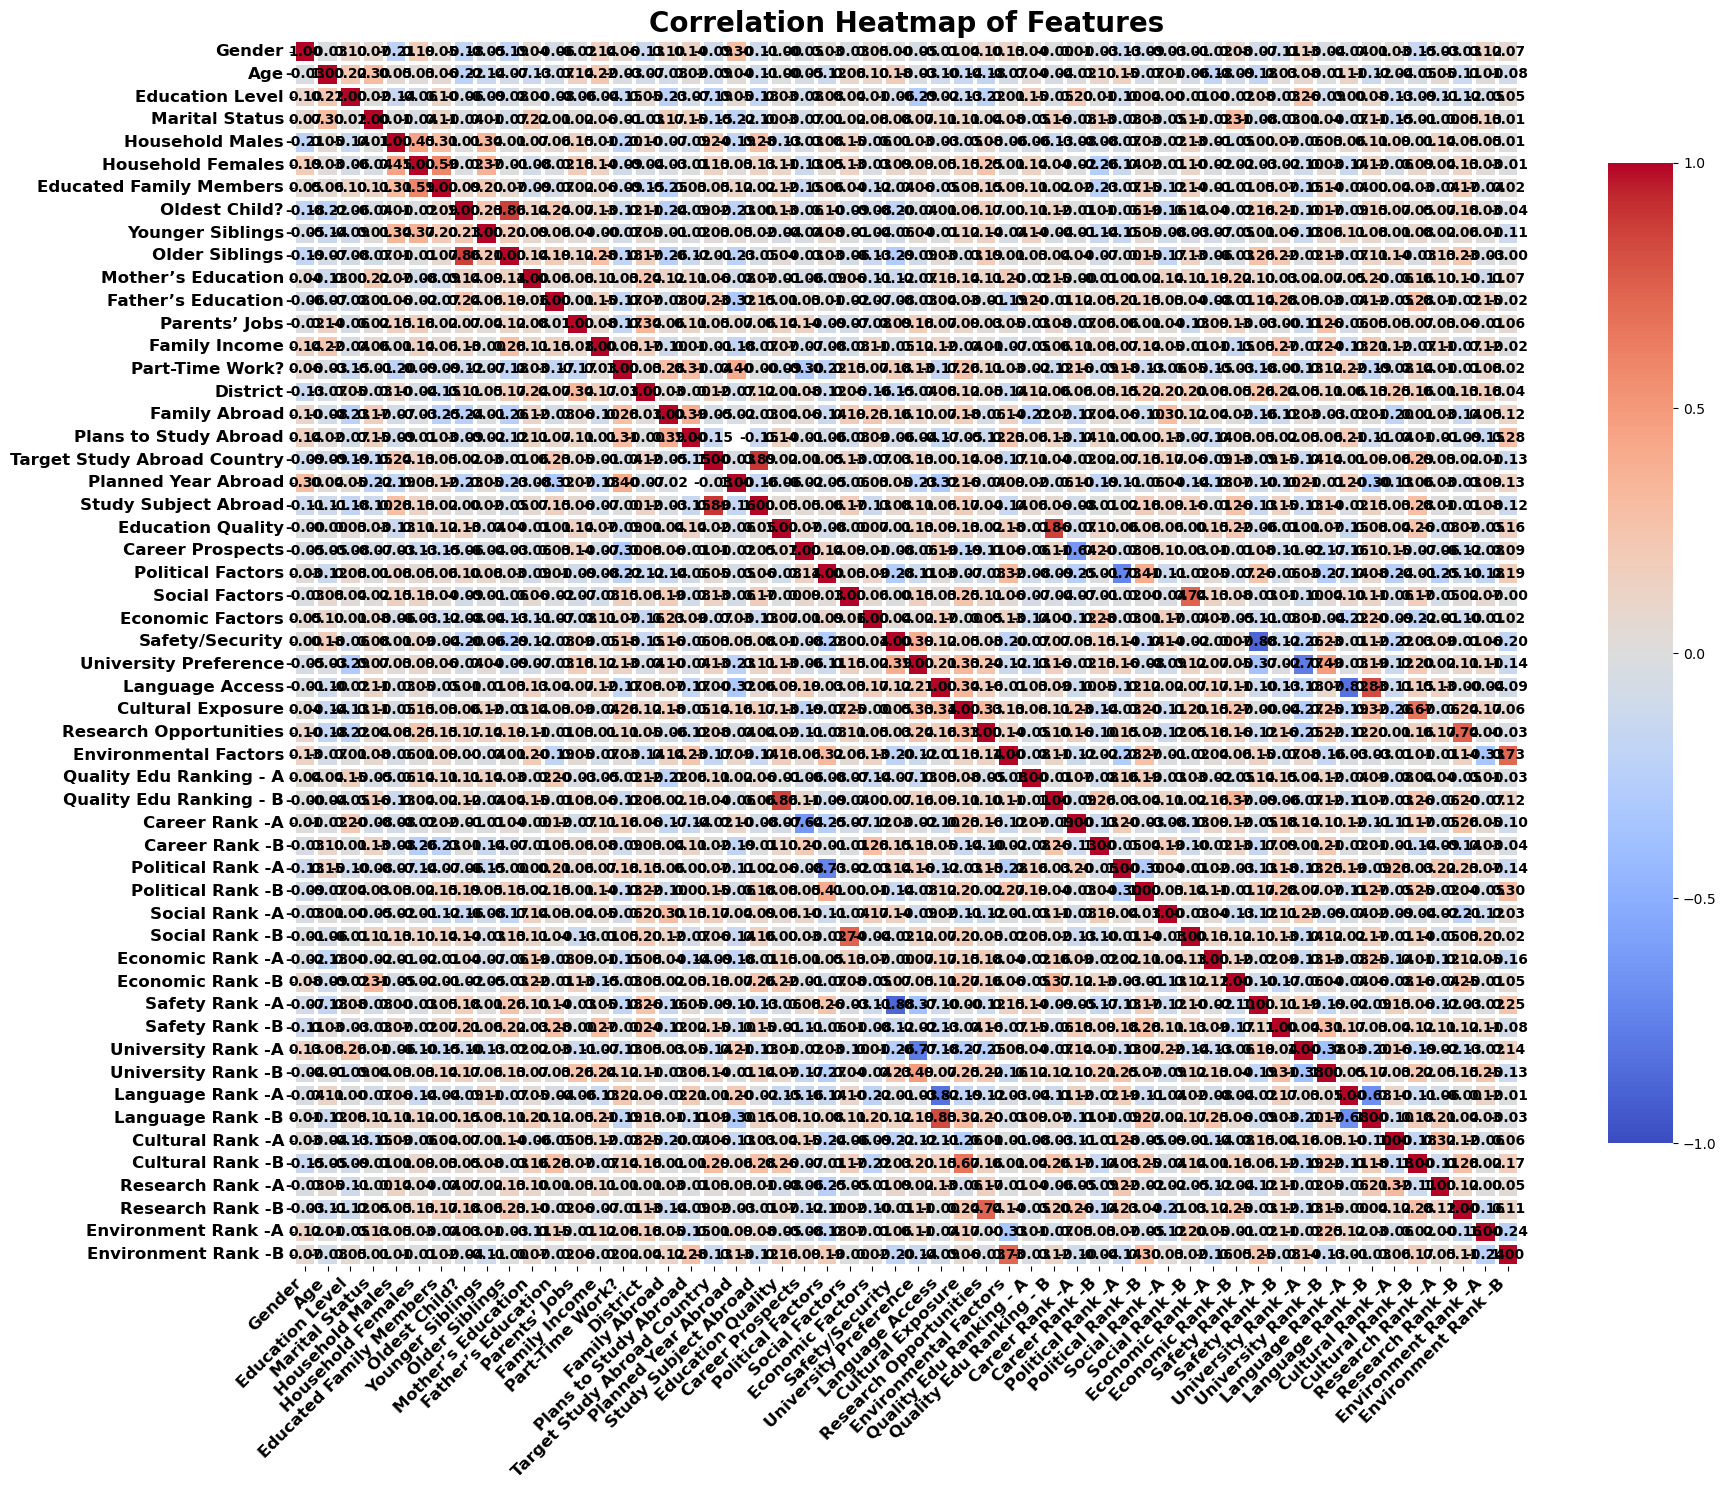

In [22]:
plt.figure(figsize=(20, 15))  

# Draw the heatmap with enhanced box aesthetics
sns.heatmap(
    correlations, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm",  
    vmin=-1, 
    vmax=1, 
    linewidths=1.5,  #
    linecolor='white',  
    annot_kws={"size": 10, "weight": 'bold', "color": 'black'},  # For annotation 
    cbar_kws={"shrink": 0.8, "aspect": 15, "ticks": [-1, -0.5, 0, 0.5, 1], "orientation": "vertical"},  # Adjust color bar size, ticks, and orientation
    square=True  # 
)

# Set titles and labels
plt.title('Correlation Heatmap of Features', fontsize=20, weight='bold')  
plt.xticks(rotation=45, ha='right', fontsize=12, weight='bold')  
plt.yticks(rotation=0, fontsize=12, weight='bold')  

# Show the heatmap
plt.tight_layout() 
# plt.savefig("correlatiosn.png")
plt.show()

## SelectKBest

To validate the outcome of the correlation matrix, statistical method known as univariate selection using the SelectKBest method was used to select the top 3 features. SelectKBest uses Chi-squared as scoring functions i.e., tests whether the occurrences of a specific feature and a specific class are independent using their frequency distribution. 

When we analyze the relationship between one feature and the target variable, we ignore the other features. That is why it is called ‘univariate
Each feature has its test score. Finally, all the test scores are compared, and the features with top scores will be selected.

In [23]:
updated_df.columns

Index(['Gender', 'Age', 'Education Level', 'Marital Status', 'Household Males',
       'Household Females', 'Educated Family Members', 'Oldest Child?',
       'Younger Siblings', 'Older Siblings', 'Mother’s Education',
       'Father’s Education', 'Parents’ Jobs', 'Family Income',
       'Part-Time Work?', 'District', 'Family Abroad', 'Plans to Study Abroad',
       'Target Study Abroad Country', 'Planned Year Abroad',
       'Study Subject Abroad', 'Education Quality', 'Career Prospects',
       'Political Factors', 'Social Factors', 'Economic Factors',
       'Safety/Security', 'University Preference', 'Language Access',
       'Cultural Exposure', 'Research Opportunities', 'Environmental Factors',
       'Quality Edu Ranking - A', 'Quality Edu Ranking - B', 'Career Rank -A',
       'Career Rank -B', 'Political Rank -A', 'Political Rank -B',
       'Social Rank -A', 'Social Rank -B', 'Economic Rank -A',
       'Economic Rank -B', 'Safety Rank -A', 'Safety Rank -B',
       'University

In [24]:
updated_df = updated_df.drop("Planned Year Abroad", axis=1)
updated_df.head()

,Gender,Age,Education Level,Marital Status,Household Males,Household Females,Educated Family Members,Oldest Child?,Younger Siblings,Older Siblings,Mother’s Education,Father’s Education,Parents’ Jobs,Family Income,Part-Time Work?,District,Family Abroad,Plans to Study Abroad,Target Study Abroad Country,Study Subject Abroad,Education Quality,Career Prospects,Political Factors,Social Factors,Economic Factors,Safety/Security,University Preference,Language Access,Cultural Exposure,Research Opportunities,Environmental Factors,Quality Edu Ranking - A,Quality Edu Ranking - B,Career Rank -A,Career Rank -B,Political Rank -A,Political Rank -B,Social Rank -A,Social Rank -B,Economic Rank -A,Economic Rank -B,Safety Rank -A,Safety Rank -B,University Rank -A,University Rank -B,Language Rank -A,Language Rank -B,Cultural Rank -A,Cultural Rank -B,Research Rank -A,Research Rank -B,Environment Rank -A,Environment Rank -B
0,0,0,0,0,2,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,4,2,3,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0
2,1,1,0,0,2,2,2,0,0,0,2,0,1,1,1,2,1,1,2,2,0,0,1,1,0,1,1,0,1,1,1,0,0,2,1,0,1,2,1,1,0,0,1,0,1,1,1,1,1,2,1,1,1
3,0,1,0,0,2,2,4,1,1,2,3,0,0,2,1,2,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,2,3,0,1,0,0,1,1,2,2,1,0,0,0,0,0,0
4,1,0,1,0,2,3,4,0,2,0,3,0,1,1,0,3,1,1,3,2,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,3,0,1,0,0,0,0,1,2,1,0,0,0,0,0,0


In [25]:
updated_df.head()

,Gender,Age,Education Level,Marital Status,Household Males,Household Females,Educated Family Members,Oldest Child?,Younger Siblings,Older Siblings,Mother’s Education,Father’s Education,Parents’ Jobs,Family Income,Part-Time Work?,District,Family Abroad,Plans to Study Abroad,Target Study Abroad Country,Study Subject Abroad,Education Quality,Career Prospects,Political Factors,Social Factors,Economic Factors,Safety/Security,University Preference,Language Access,Cultural Exposure,Research Opportunities,Environmental Factors,Quality Edu Ranking - A,Quality Edu Ranking - B,Career Rank -A,Career Rank -B,Political Rank -A,Political Rank -B,Social Rank -A,Social Rank -B,Economic Rank -A,Economic Rank -B,Safety Rank -A,Safety Rank -B,University Rank -A,University Rank -B,Language Rank -A,Language Rank -B,Cultural Rank -A,Cultural Rank -B,Research Rank -A,Research Rank -B,Environment Rank -A,Environment Rank -B
0,0,0,0,0,2,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,4,2,3,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0
2,1,1,0,0,2,2,2,0,0,0,2,0,1,1,1,2,1,1,2,2,0,0,1,1,0,1,1,0,1,1,1,0,0,2,1,0,1,2,1,1,0,0,1,0,1,1,1,1,1,2,1,1,1
3,0,1,0,0,2,2,4,1,1,2,3,0,0,2,1,2,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,2,3,0,1,0,0,1,1,2,2,1,0,0,0,0,0,0
4,1,0,1,0,2,3,4,0,2,0,3,0,1,1,0,3,1,1,3,2,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,3,0,1,0,0,0,0,1,2,1,0,0,0,0,0,0


In [26]:
# Assuming your dataframe is df and the column is 'Plans to Study Abroad'

# Replace 'I am already in Abroad' and 'Yes' with 1, and keep 'No plan to go' as 2
updated_df['Plans to Study Abroad'] = updated_df['Plans to Study Abroad'].replace({1: 0, 0: 0, 2:1})


In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Define your feature columns (replace with relevant columns from your dataset)
X = updated_df[['Gender', 'Age', 'Education Level', 'Marital Status', 'Household Males',
       'Household Females', 'Educated Family Members', 'Oldest Child?',
       'Younger Siblings', 'Older Siblings', 'Mother’s Education',
       'Father’s Education', 'Parents’ Jobs', 'Family Income',
       'Part-Time Work?', 'District', 'Family Abroad',
       'Target Study Abroad Country',
       'Study Subject Abroad',  'Education Quality',
       'Career Prospects', 'Political Factors', 'Social Factors',
       'Economic Factors', 'Safety/Security', 'University Preference',
       'Language Access', 'Cultural Exposure', 'Research Opportunities',
       'Environmental Factors', 'Quality Edu Ranking - A',
       'Quality Edu Ranking - B', 'Career Rank -A', 'Career Rank -B',
       'Political Rank -A', 'Political Rank -B', 'Social Rank -A',
       'Social Rank -B', 'Economic Rank -A', 'Economic Rank -B',
       'Safety Rank -A', 'Safety Rank -B', 'University Rank -A',
       'University Rank -B', 'Language Rank -A', 'Language Rank -B',
       'Cultural Rank -A', 'Cultural Rank -B', 'Research Rank -A',
       'Research Rank -B', 'Environment Rank -A', 'Environment Rank -B']]  # Independent columns
y = updated_df['Plans to Study Abroad']  # target variable)

# Define the range of K values to evaluate
k_values = range(2,53)  # Adjust these based on your requirement

best_k = 0  # Variable to keep track of best K value
best_score = 0  # Variable to keep track of best score

for k in k_values:
    # Apply SelectKBest to extract the top k features
    bestfeatures = SelectKBest(score_func=chi2, k=k)
    fit = bestfeatures.fit(X, y)

    dfscores = pd.DataFrame(fit.scores_)  # Scores for each feature
    dfcolumns = pd.DataFrame(X.columns)  # Feature names

    # Concatenate the dataframes for better visualization
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Specs', 'Score']  # Naming the dataframe columns

    # Evaluate and update the best K value based on the sum of scores
    if featureScores['Score'].sum() > best_score:
        best_score = featureScores['Score'].sum()
        best_k = k

# Display the results
print(f"The best value of K is {best_k} with a total score of {best_score}.")

print("---")
print("Feature Scores for all features:")
print(featureScores)
print("---")
best_k = 3
print(f"Top {best_k} Features based on the scores:")
print(featureScores.nlargest(best_k, 'Score'))  # Print the top features based on the best K value

The best value of K is 2 with a total score of 267.9110097806622.
---
Feature Scores for all features:
                          Specs       Score
0                        Gender    1.248500
1                           Age    0.877334
2               Education Level    0.144231
3                Marital Status    3.800131
4               Household Males    3.287633
5             Household Females    0.246526
6       Educated Family Members    0.000587
7                 Oldest Child?    0.197444
8              Younger Siblings    0.080133
9                Older Siblings    0.598352
10           Mother’s Education    0.408654
11           Father’s Education    0.077063
12                Parents’ Jobs    0.813808
13                Family Income    0.159987
14              Part-Time Work?    2.608340
15                     District    0.501884
16                Family Abroad    4.389330
17  Target Study Abroad Country  114.092308
18         Study Subject Abroad   67.569231
19            Edu

Now we know these these feature are most go for the model creation. 



----

# Splitting data into Training and Testing samples

We don't use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as training data and the rest 30% is used as testing data.

In [40]:
# # Selected features based on feature selection analysis

# selected_features = ['Target Study Abroad Country', 'Family Abroad', 'Study Subject Abroad', 'Part-Time Work?', 'Environmental Factors', 'Marital Status', 'Father’s Education', 'Education Quality', 'Older Siblings', 'Social Factors']

# # Selected features based on feature selection analysis with ranking
# selected_features_rank = ['Target Study Abroad Country', 'Study Subject Abroad', 'Family Abroad', 'Part-Time Work?', 'Language Rank -A', 'Language Rank -B', 'Environment Rank -A', 'Environment Rank -B', 'Environmental Factors', 'Father’s Education', 'Safety/Security', 'Cultural Exposure', 'Social Factors', 'Career Rank -A', 'Parents’ Jobs', 'Economic Rank -A', 'Political Factors', 'Gender', 'Political Rank -A', 'Research Opportunities', 'Education Level', 'Education Quality', 'Marital Status', 'Quality Edu Ranking - A', 'Career Rank -B', 'Mother’s Education', 'Language Access', 'Social Rank -A', 'Older Siblings', 'Quality Edu Ranking - B', 'Educated Family Members', 'Younger Siblings', 'University Rank -B', 'Household Males', 'Economic Rank -B', 'Safety Rank -B', 'Economic Factors', 'Research Rank -B', 'Social Rank -B', 'Oldest Child?', 'Cultural Rank -B', 'University Preference', 'Political Rank -B', 'Cultural Rank -A', 'District', 'University Rank -A', 'Safety Rank -A', 'Age', 'Household Females', 'Family Income', 'Research Rank -A', 'Career Prospects']


In [41]:
# Top 10 
selected_features = ['Target Study Abroad Country', 'Family Abroad', 'Study Subject Abroad', 'Part-Time Work?', 'Environmental Factors']


In [42]:
df.head()

,Gender,Age,Education Level,Marital Status,Household Males,Household Females,Educated Family Members,Oldest Child?,Younger Siblings,Older Siblings,Mother’s Education,Father’s Education,Parents’ Jobs,Family Income,Part-Time Work?,District,Family Abroad,Abroad Country,Plans to Study Abroad,Reasons for Staying,Target Study Abroad Country,Planned Year Abroad,Study Subject Abroad,Decision Difficulty,AI Tool Usefulness (1-10),Current Country,Study Start Date,Study Subject,Choosing Difficulty,AI Tool Usefulness (1-10).1,Education Quality,Career Prospects,Political Factors,Social Factors,Economic Factors,Safety/Security,University Preference,Language Access,Cultural Exposure,Research Opportunities,Environmental Factors,AI Familiarity,Key AI Factors,Valuable AI Insights,AI Bias Concerns,Trust in AI,Used AI Tools,Additional Comments,Quality Edu Ranking - A,Quality Edu Ranking - B,Career Rank -A,Career Rank -B,Political Rank -A,Political Rank -B,Social Rank -A,Social Rank -B,Economic Rank -A,Economic Rank -B,Safety Rank -A,Safety Rank -B,University Rank -A,University Rank -B,Language Rank -A,Language Rank -B,Cultural Rank -A,Cultural Rank -B,Research Rank -A,Research Rank -B,Environment Rank -A,Environment Rank -B
0,0,0,0,0,2,2,4,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,0,NaN,0,0,0,0,3.0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,4,2,3,1,1,1,1,1,1,0,0,1,1,1,1,NaN,1,2026.0,1,1,8.0,1,1,1,1,NaN,0,0,1,0,0,1,1,0,0,0,0,1,1,1,1,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0
2,1,1,0,0,2,2,2,0,0,0,2,0,1,1,1,2,1,1,1,NaN,2,2025.0,2,1,7.0,1,1,1,1,NaN,0,0,1,1,0,1,1,0,1,1,1,0,0,2,2,2,0,0,0,0,2,1,0,1,2,1,1,0,0,1,0,1,1,1,1,1,2,1,1,1
3,0,1,0,0,2,2,4,1,1,2,3,0,0,2,1,2,1,1,2,NaN,0,NaN,0,0,NaN,1,1,1,1,NaN,0,0,0,0,0,1,0,0,0,0,0,0,2,3,2,3,0,0,1,0,1,1,1,2,3,0,1,0,0,1,1,2,2,1,0,0,0,0,0,0
4,1,0,1,0,2,3,4,0,2,0,3,0,1,1,0,3,1,1,1,NaN,3,2025.0,2,1,7.0,1,1,1,1,NaN,0,1,1,0,0,1,1,0,0,0,0,2,3,4,2,4,0,0,1,0,0,0,0,1,3,0,1,0,0,0,0,1,2,1,0,0,0,0,0,0


In [43]:
# Separate Target Variable and Predictor Variables
# Here I am keeping the selected feature only 
X = updated_df[selected_features]
y = updated_df['Plans to Study Abroad']  

In [44]:
X

,Target Study Abroad Country,Family Abroad,Study Subject Abroad,Part-Time Work?,Environmental Factors
0,0,0,0,0,0
1,1,1,1,0,0
2,2,1,2,1,1
3,0,1,0,1,0
4,3,1,2,0,0
5,0,1,0,1,1
6,4,1,1,1,0
7,0,0,0,1,0
8,4,0,2,1,1
9,0,1,0,0,1


In [45]:
y

0      0
1      0
2      0
3      1
4      0
5      0
6      0
7      0
8      0
9      0
10     1
11     0
12     0
13     1
14     1
15     1
16     1
17     0
18     0
19     1
20     1
21     1
22     1
23     0
24     1
25     0
26     1
27     1
28     1
29     1
30     0
31     0
32     0
33     0
34     1
35     1
36     0
37     0
38     0
39     1
40     1
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     1
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     1
57     1
58     0
59     0
60     1
61     0
62     1
63     0
64     1
65     0
66     0
67     1
68     1
69     0
70     0
71     0
72     0
73     0
74     0
75     1
76     0
77     1
78     1
79     0
80     0
81     0
82     1
83     0
84     0
85     1
86     1
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     1
97     1
98     1
99     0
100    0
Name: Plans to Study Abroad, dtype: int64

In [46]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)

In [47]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (70, 5)
y_train -  (70,)
X_test -  (31, 5)
y_test -  (31,)


# Baseline for models
We will train four types of classifiers and decide which classifier will be more effective in detecting anemic condition.

We will use:
**Classification Models**

1. Logistic Regression
2. Decision Trees
3. Random Forest
4. Naive Bayes Classifier
5. SVM
6. KNN


# Model Building
We are aware that our dataset is highly imbalanced, however, we check the performance of imbalance dataset first and later we implement some techniques to balance the dataset and again check the performance of balanced dataset. Finally, we will compare each regression models performance.

# Logistic Regression

In [48]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

LogisticRegression()

In [49]:
# Predict from Test set

y_pred = logreg.predict(X_test)

In [50]:
# Model Evolution
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.77      0.91      0.83        11

    accuracy                           0.87        31
   macro avg       0.86      0.88      0.86        31
weighted avg       0.88      0.87      0.87        31



In [51]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

Accuracy :0.87097
AUC : 0.87955
Precision : 0.76923
Recall : 0.90909
F1 : 0.83333




Recall (True Positive Rate): % of all Anemic cases captured.

Precision: Out of all items labeled as Anemic, what percentage of them is actually Anemic?

Accuracy: How correct the model is (misleading for Anemic/imbalanced data)

F1 score: combination of recall and precision into one metric. F1 score is the weighted average of precision and recall, taking BOTH false positives and false negatives into account. Usually much more useful than accuracy, especially with uneven classes.

In [52]:
# Predicted values counts for Anemic and Non Anemic of test dataset
pd.Series(y_pred).value_counts()

0    18
1    13
dtype: int64

Our model predicted 183 cases as Anemic and 244 as non anemic from the test dataset.

In [53]:
# Actual values counts for Anemic and Non Anemic  of test dataset
pd.Series(y_test).value_counts()

0    20
1    11
Name: Plans to Study Abroad, dtype: int64

There are originally 181 Anemic cases and our model predicted only 183 fraud transaction. 

So the accuracy of our model should be 183/181, right?


In [54]:
183/181

1.011049723756906

However, this not the case. Actually there are originally 181 Anemic cases and 246 non Anemic cases in the test dataset.

However, our model predicted only 183 Anemic cases. Also, it should be kept in mind that these 183 predicted anemic cases may not be identified correctly. It means that these predicted 181 anemic transactions are NOT only from 183 originally anemic transaction, but they may also be from non anemic cases as well.

So we need to see its accuracy in differnt way.


# Model Evolution Matrix

In [55]:
# confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[17,  3],
       [ 1, 10]])

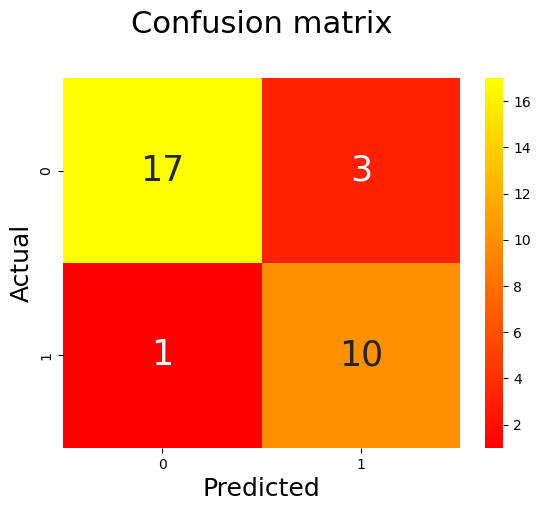

In [56]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="autumn" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

There are 181 cases recognised as True Postive, means they are orignally anemic cases and our model precited them as anemic cases only.

True Negative - 244 (truely saying negative - non anemic cases correctly identified as non anemic)

True Postive - 181 (truely saying positive - anemic cases correctly identified as anemic)

False Negative - 0 ( falsely saying negative - anemic transaction incorrectly identified as non anemic)

False Positive - 0 ( falsely saying positive - non anemic transaction incorrectly identified as anemic)

We already know that we have 181 anemic cases in our test dataset, but our model predicted only 181 anemic casess. So the real accuracy of our model is 181/181

In [57]:
181/181

1.0

So, 100% is the real accuracy of our model, which is nothing but the Recall Score (here we have same accuracy and recall). So we have the emphasis on Recall score and F1 score to measure the performance of our model, not the accuracy.

# Receiver Operating Characteristics (ROC)

ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a binary classification model, by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

ROC curves are typically evaluated on the test data or validation data, and not on the training data or during cross-validation. This is because the performance on the training data or during cross-validation may not be indicative of the true performance of the model on unseen data.

 higher the Area Under the Curve (AUC) score the better the model is at predicting Anemic/non-Anemic cases.
 
 Higher the area under the curve , better the model and it's ability to seperate the positive and negative class.
 
 
  <img src= https://vitalflux.com/wp-content/uploads/2020/09/Screenshot-2020-09-01-at-3.44.15-PM.png >
 
 > However, AUC is not a good metric for imbalanced datasets
 
 
 ROC curves can sometimes be misleading in some very imbalanced applications. A ROC curve can still look pretty good (ie better than random) while misclassifying most or all of the minority class.

In contrast, PR curves are specifically tailored for the detection of rare events and are pretty useful in those scenarios. They will show that your classifier has a low performance if it is misclassifying most or all of the minority class. But they don't translate well to more balanced cases, or cases where negatives are rare.

In addition, because they are sensitive to the baseline probability of positive events, they don't generalize well and only apply to the specific dataset they were built on, or to datastets with the exact same balance. This means it is generally difficult to compare PR curves from different studies, limiting their usefulness.

As always, it is important to understand the tools that are available to you and select the right one for the right application. I suggest reading the question ROC vs precision-and-recall curves here on CV.

In [58]:
metrics.roc_auc_score(y_test , y_pred) 

0.8795454545454546

In [59]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[5.35048612e-01, 4.64951388e-01],
       [7.65658212e-01, 2.34341788e-01],
       [9.99923229e-01, 7.67714173e-05],
       [9.97375440e-01, 2.62456038e-03],
       [4.17527615e-01, 5.82472385e-01],
       [7.13460876e-01, 2.86539124e-01],
       [9.85811595e-01, 1.41884046e-02],
       [5.35048612e-01, 4.64951388e-01],
       [1.55210797e-01, 8.44789203e-01],
       [7.13460876e-01, 2.86539124e-01],
       [9.52386590e-01, 4.76134097e-02],
       [4.17527615e-01, 5.82472385e-01],
       [9.86707098e-01, 1.32929019e-02],
       [2.48849291e-01, 7.51150709e-01],
       [9.99558485e-01, 4.41515357e-04],
       [9.93812213e-01, 6.18778672e-03],
       [2.48849291e-01, 7.51150709e-01],
       [1.55210797e-01, 8.44789203e-01],
       [2.48849291e-01, 7.51150709e-01],
       [9.98210726e-01, 1.78927408e-03],
       [2.48849291e-01, 7.51150709e-01],
       [2.48849291e-01, 7.51150709e-01],
       [5.35048612e-01, 4.64951388e-01],
       [1.55210797e-01, 8.44789203e-01],
       [2.488492

AUC -  0.8795454545454546 



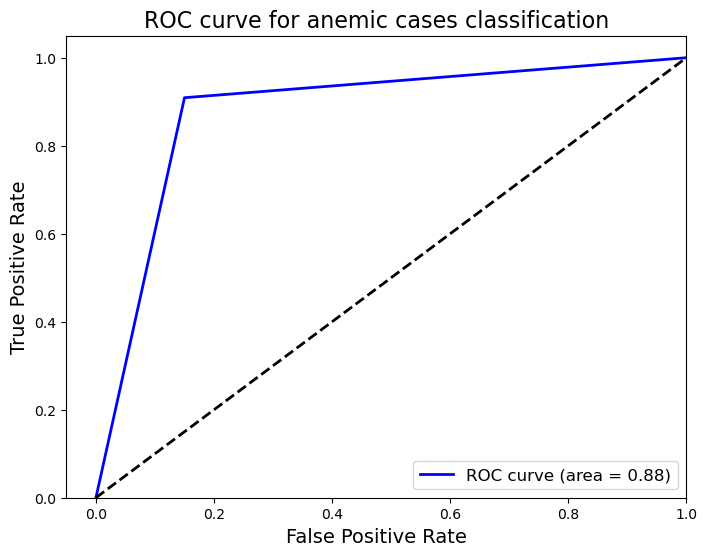

In [60]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC curve for anemic cases classification', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()


f1=0.833


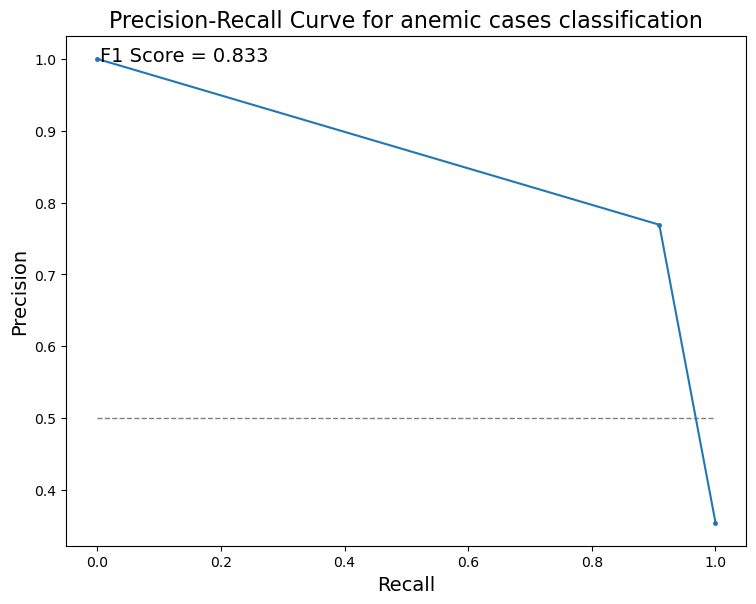

In [61]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)

print('f1=%.3f' % (f1))

# create figure and axis objects with custom size and padding
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95)

# plot no skill
ax.plot([0, 1], [0.5, 0.5], linestyle='--', color='gray', lw=1)

# plot the precision-recall curve
ax.plot(recall, precision, marker='.', markersize=5)

# set axis labels and title
ax.set_xlabel('Recall', fontsize=14)
ax.set_ylabel('Precision', fontsize=14)
ax.set_title('Precision-Recall Curve for anemic cases classification', fontsize=16)

# show F1 score in the plot
ax.text(0.05, 0.95, f'F1 Score = {f1:.3f}', transform=ax.transAxes, fontsize=14)

# show the plot
plt.show()


-----

# Class Imbalance

As found in EDA, the response variable Result have unequal data.



Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally. If one applies classifiers on the dataset, they are likely to predict everything as the majority class. This was often regarded as a problem in learning from highly imbalanced datasets.


To tackle the imbalance, we will be focuing on 

 <img src="http://resources.experfy.com/wp-content/uploads/2021/05/10itx-rI4iTMB42t4ya64Ow.png" >


## Random Oversampling 
Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.


<img src="https://www.svds.com/wp-content/uploads/2016/08/ImbalancedClasses_fig5.jpg">


## Random undersampling
Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.

## Synthetic Minority OverSampling Technique (SMOTE)

In this technique, instead of simply duplicating data from the minority class, we synthesize new data from the minority class. This is a type of data augmentation for tabular data can be very effective. This approach to synthesizing new data is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short.



## Adaptive Synthetic Sampling Method for Imbalanced Data (ADASYN)
ADASYN (Adaptive Synthetic) is an algorithm that generates synthetic data, and its greatest advantages are not copying the same minority data, and generating more data for “harder to learn” examples.

# Logistic Regression with Random Undersampling technique 

# Tackling Data Leakage

Data leakage occurs when information from outside the training data set is used to create a model, or when information from the test set is inadvertently included in the training process. 

> Simply, Identical samples in the both train and test. 

This can result in overestimation of the accuracy of the model, as the model is being trained on data that it will eventually see during testing.

To tackle daata leakage we will undersample or over sample ONLY train data.


In [77]:
print('Original dataset shape %s' % Counter(y_train))

# Undersampling only on train
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_rus))

Original dataset shape Counter({0: 45, 1: 25})
Resampled dataset shape Counter({0: 25, 1: 25})


In [91]:
# Undersampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_rus, y_train_rus)

y_pred_rus = logreg.predict(X_test)

In [92]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_rus , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_rus)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_rus)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_rus)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rus)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_rus)))

Accuracy :0.83871
AUC : 0.87500
Precision : 0.68750
Recall : 1.00000
F1 : 0.81481
Kappa Statistic : 0.68041


AUC -  0.875 



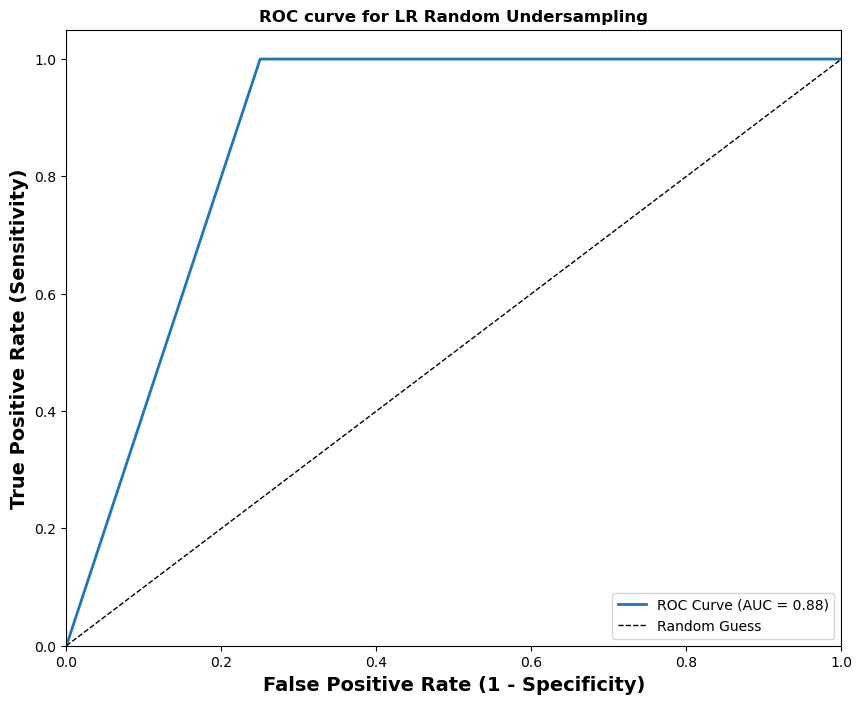

In [93]:
# plot ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rus)

auc = metrics.roc_auc_score(y_test, y_pred_rus)
print("AUC - ",auc,"\n")

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

# set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# add labels and title
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14, fontweight='bold')
plt.title('ROC curve for LR Random Undersampling', fontsize=12, fontweight='bold')

# add legend
plt.legend(loc="lower right")

plt.show()


f1=0.815


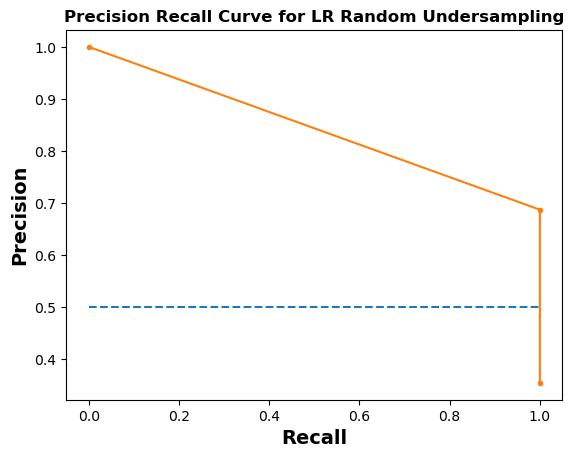

In [94]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_rus)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_rus)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# add labels and title
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR Random Undersampling', fontsize=12, fontweight='bold')

# show the plot
plt.show()

Here our model have p-r = 1 and area under the curve for precision and recall is high too. 

The dotted blue line is "no skill" line which  represents the baseline for the precision-recall curve. It is the line where precision is equal to recall, which means that the model is randomly guessing the positive class. The dashed line in the plot shows this line as a reference for comparison with the precision-recall curve of the model. If the model's curve is above the dashed line, it indicates that the model is performing better than random guessing.

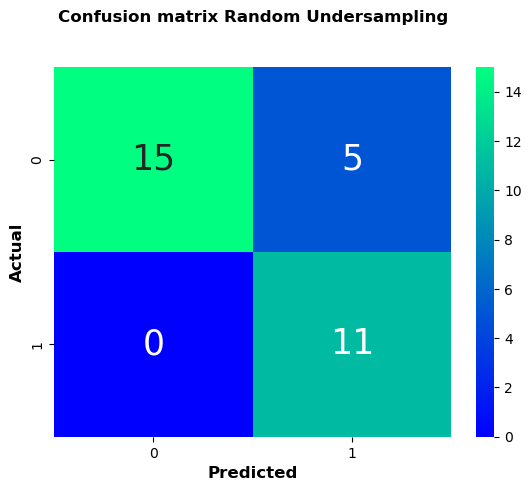

In [95]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_rus)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix Random Undersampling', y=1.1, fontsize = 12, fontweight='bold')
plt.xlabel('Predicted',fontsize = 12, fontweight='bold')
plt.ylabel('Actual',fontsize = 12, fontweight='bold')

# ax.xaxis.set_ticklabels(['non anemic', 'anemic']); 
# ax.yaxis.set_ticklabels(['non anemic', 'anemic']);

plt.show()

# Logistic Regression with Random Oversampling technique

In [96]:



print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({0: 45, 1: 25})
Resampled dataset shape Counter({0: 45, 1: 45})


In [97]:
# Oversampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_ros, y_train_ros)

y_pred_ros = logreg.predict(X_test)

In [98]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_ros))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_ros)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_ros)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_ros)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_ros)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_ros)))


Accuracy :0.83871
AUC : 0.87500
Precision : 0.68750
Recall : 1.00000
F1 : 0.81481
Kappa Statistic : 0.68041


F1 score of 0.94 on the test set with data leakage and a score of 0.94 without data leakage.

Here, data leakage did not have a significant impact on the model's performance.

AUC -  0.875 



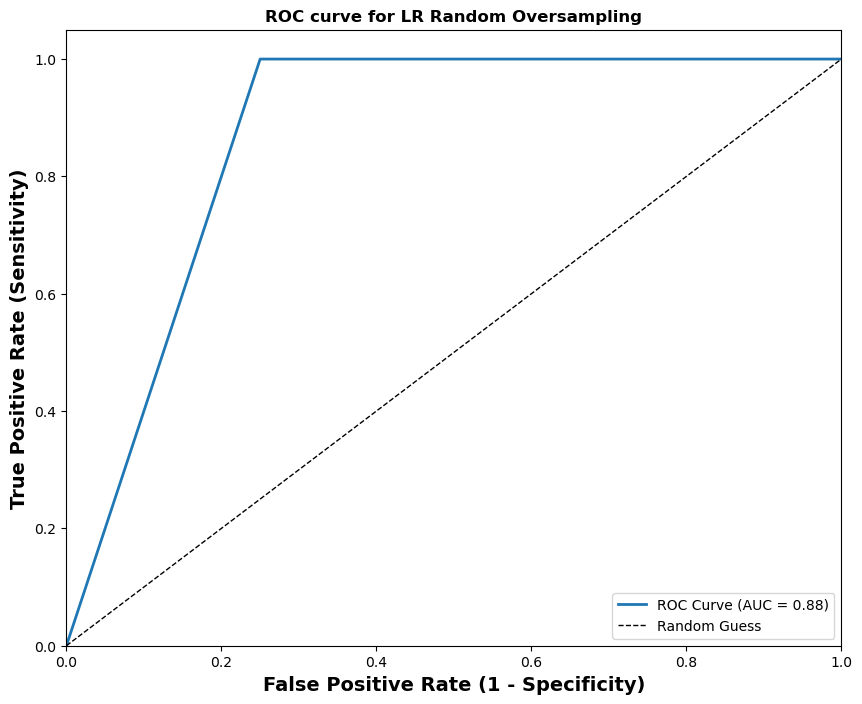

In [99]:
# plot ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ros)

auc = metrics.roc_auc_score(y_test, y_pred_ros)
print("AUC - ",auc,"\n")

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

# set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# add labels and title
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14,fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14, fontweight='bold')
plt.title('ROC curve for LR Random Oversampling', fontsize=12, fontweight='bold')

# add legend
plt.legend(loc="lower right")

plt.show()


f1=0.815


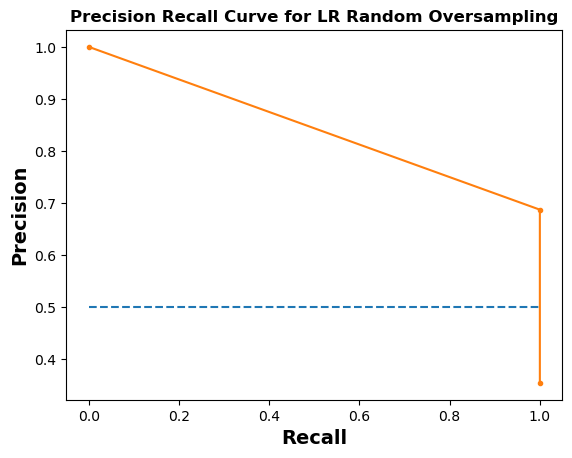

In [117]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_ros)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_ros)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')


# add labels and title
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR Random Oversampling', fontsize=12, fontweight='bold')



# show the plot
plt.show()

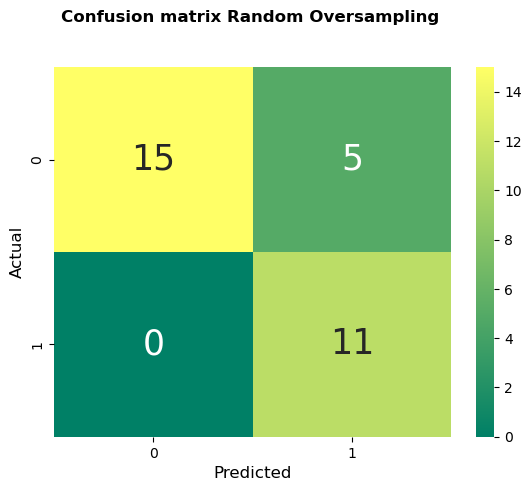

In [118]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_ros)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="summer" ,fmt='g')

plt.title('Confusion matrix Random Oversampling ', y=1.1,  fontsize=12, fontweight='bold')
plt.xlabel('Predicted',fontsize = 12)
plt.ylabel('Actual',fontsize = 12)

# ax.xaxis.set_ticklabels(['non anemic', 'anemic']); 
# ax.yaxis.set_ticklabels(['non anemic', 'anemic']);

plt.show()

# Logistic Regression with SMOTE data

In [119]:


print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 45, 1: 25})
Resampled dataset shape Counter({0: 45, 1: 45})


In [120]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg.predict(X_test)

In [121]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_smote))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_smote)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_smote)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_smote)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_smote)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_smote)))

Accuracy :0.83871
AUC : 0.87500
Precision : 0.68750
Recall : 1.00000
F1 : 0.81481
Kappa Statistic : 0.68041


F1 score of 0.99 on the test set with data leakage and a score of 0.98 without data leakage.

Here, data leakage did not have a significant impact on the model's performance.

AUC -  0.875 



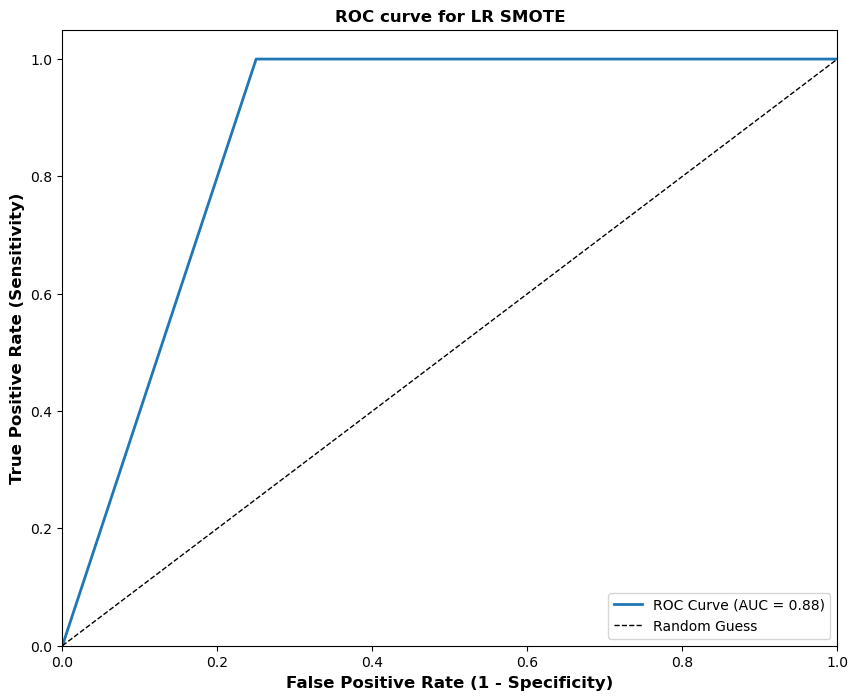

In [122]:
# plot ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

auc = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",auc,"\n")

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

# set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# add labels and title
plt.xlabel('False Positive Rate (1 - Specificity)',  fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)',  fontsize=12, fontweight='bold')
plt.title('ROC curve for LR SMOTE',  fontsize=12, fontweight='bold')

# add legend
plt.legend(loc="lower right")

plt.show()


f1=0.815


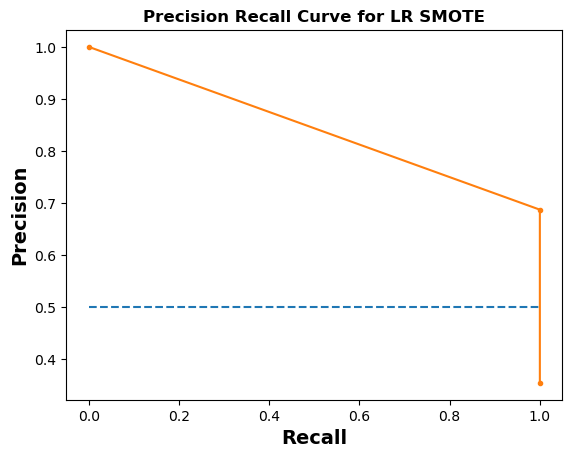

In [123]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_smote)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_smote)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# add labels and title
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR SMOTE', fontsize=12, fontweight='bold')





# show the plot
plt.show()

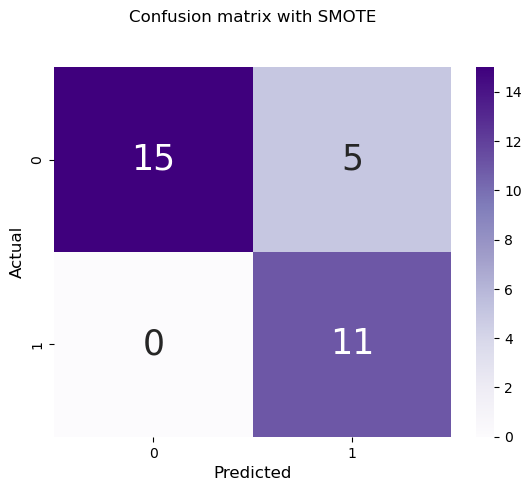

In [124]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="Purples" ,fmt='g')

plt.title('Confusion matrix with SMOTE', y=1.1, fontsize = 12)
plt.xlabel('Predicted',fontsize = 12)
plt.ylabel('Actual',fontsize = 12)



plt.show()

# Logistic Regression with ADASYN data

In [125]:
print('Original dataset shape %s' % Counter(y_train))

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({0: 45, 1: 25})
Resampled dataset shape Counter({0: 45, 1: 44})


In [126]:
#  ADASYN Sampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_adasyn, y_train_adasyn)

y_pred_adasyn = logreg.predict(X_test)

In [127]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_pred_adasyn))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_adasyn)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_adasyn)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_adasyn)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_adasyn)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_adasyn)))

Accuracy :0.83871
AUC : 0.82500
Precision : 0.61111
Recall : 1.00000
F1 : 0.75862
Kappa Statistic : 0.56859


AUC -  0.825 



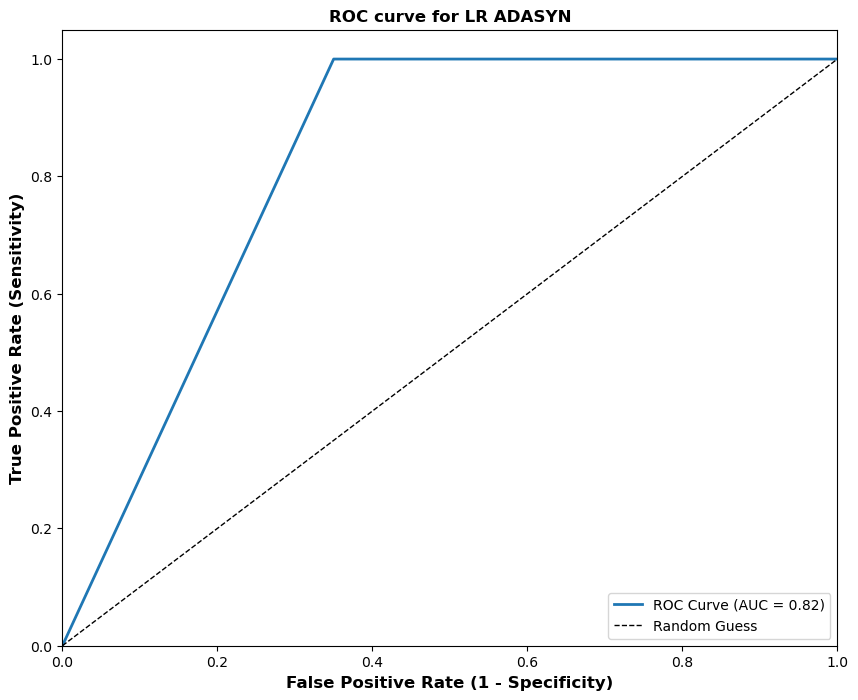

In [128]:
# plot ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_adasyn)

auc = metrics.roc_auc_score(y_test, y_pred_adasyn)
print("AUC - ",auc,"\n")

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

# set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# add labels and title
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12,fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12,fontweight='bold')
plt.title('ROC curve for LR ADASYN', fontsize=12,fontweight='bold')

# add legend
plt.legend(loc="lower right")

plt.show()


f1=0.759


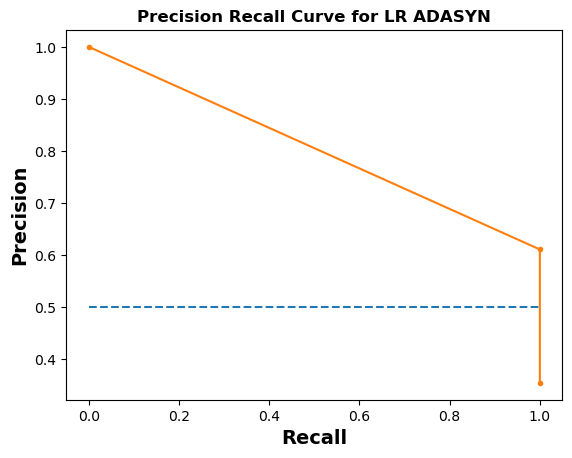

In [129]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_adasyn)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_adasyn)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# add labels and title
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR ADASYN', fontsize=12, fontweight='bold')

# show the plot
plt.show()

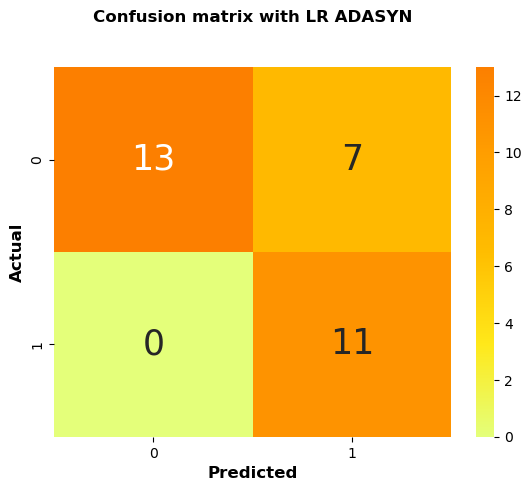

In [130]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_adasyn)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="Wistia" ,fmt='g')

plt.title('Confusion matrix with LR ADASYN', y=1.1, fontsize = 12,fontweight='bold')
plt.xlabel('Predicted',fontsize = 12,fontweight='bold')
plt.ylabel('Actual',fontsize = 12,fontweight='bold')


plt.show()

We have seen that imbalance dataset have Recall score of  100% and also with balanced dataset we have 100%.

It is possible to have a Recall score of 100% for both imbalanced and balanced datasets, but it would be very rare and dependent on the specific dataset and model used.

However, it is important to note that a Recall score of 100% does not necessarily mean that the model is perfect. It is possible for the model to have high Recall but low Precision, which means that it is correctly identifying most of the positive cases but also identifying many false positives. Therefore, it is important to consider both Recall and Precision together when evaluating the performance of a classification model.

# Distribution of balaced dataset


# Building different models with different balanced datasets

Let's now try different models , first by creating multiple datasets for undersampled , oversampled and SMOTE sampled

In [131]:
names_lst = []

# Empty list to capture performance matrix for train set
aucs_train_lst = []
accuracy_train_lst = []
precision_train_lst = []
recall_train_lst = []
f1_train_lst = []

# Empty list to capture performance matrix for test set
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []
kappa_lst = []

# Function for model building and performance measure

def build_measure_model(models):
    plt.figure(figsize=(12,6))

    for name, model, X_train, y_train, X_test, y_test in models:
        
        names_lst.append(name)

        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_lst.append(Accuracy_train)
        
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc
        Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
        aucs_train_lst.append(Aucs_train)
        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_lst.append(Aucs_test)

        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_lst.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_lst.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_lst.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)

        #print('F1 Score of '+ name +' model : {0:0.5f}'.format(F1Score_test))
        
        
        # calculate kappa Statictis
        kappa = cohen_kappa_score(y_test, y_test_pred)
        kappa_lst.append(kappa)

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)
        
        
        
        

        print("Model Name :", name)
        
        print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
        print('Train AUC : {0:0.5f}'.format(Aucs_train))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        
        print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
        print('Train Recall : {0:0.5f}'.format(RecallScore_train))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
        print('Train F1 : {0:0.5f}'.format(F1Score_train))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        
        print('Kappa Statistic : {0:0.5f}'.format(kappa))
        
        print('Confusion Matrix : \n', cnf_matrix)
        
        print("\n")


        # plot ROC Curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
        #---------- For loops ends here--------#


    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    #plt.title('ROC curve for Predicting a anemia cases')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

# Logistic Regression (LR)

Model Name : LR imbalance
Train Accuracy :0.88571
Test Accuracy :0.87097
Train AUC : 0.87556
Test AUC : 0.87955
Train Precision : 0.84000
Test Precision : 0.76923
Train Recall : 0.84000
Test Recall : 0.90909
Train F1 : 0.84000
Test F1 : 0.83333
Kappa Statistic : 0.72926
Confusion Matrix : 
 [[17  3]
 [ 1 10]]


Model Name : LR Undersampling
Train Accuracy :0.90000
Test Accuracy :0.83871
Train AUC : 0.90000
Test AUC : 0.87500
Train Precision : 0.85714
Test Precision : 0.68750
Train Recall : 0.96000
Test Recall : 1.00000
Train F1 : 0.90566
Test F1 : 0.81481
Kappa Statistic : 0.68041
Confusion Matrix : 
 [[15  5]
 [ 0 11]]


Model Name : LR Oversampling
Train Accuracy :0.88889
Test Accuracy :0.83871
Train AUC : 0.88889
Test AUC : 0.87500
Train Precision : 0.83019
Test Precision : 0.68750
Train Recall : 0.97778
Test Recall : 1.00000
Train F1 : 0.89796
Test F1 : 0.81481
Kappa Statistic : 0.68041
Confusion Matrix : 
 [[15  5]
 [ 0 11]]


Model Name : LR SMOTE
Train Accuracy :0.90000
Test Acc

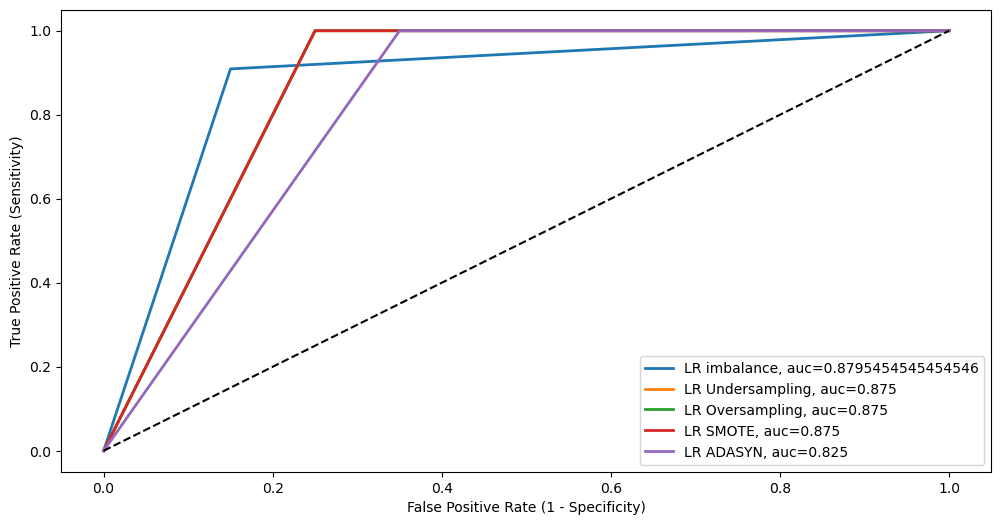

In [132]:
# Logistic Regression (LR)

LRmodels = []

LRmodels.append(('LR imbalance', LogisticRegression(solver='liblinear', multi_class='ovr'), X_train,y_train,X_test,y_test))
LRmodels.append(('LR Undersampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_rus,y_train_rus,X_test,y_test))
LRmodels.append(('LR Oversampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_ros,y_train_ros,X_test,y_test))
LRmodels.append(('LR SMOTE', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_smote,y_train_smote,X_test,y_test))
LRmodels.append(('LR ADASYN', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(LRmodels)

In [133]:
# Beautify the output with AUC displayed as a float with 2 decimal points
for name, model, X_train, y_train, X_test, y_test in LRmodels:
    y_pred = model.fit(X_train, y_train).predict(X_test)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
    print(f'{name} AUC: {auc:.2f}')

LR imbalance AUC: 0.88
LR Undersampling AUC: 0.88
LR Oversampling AUC: 0.88
LR SMOTE AUC: 0.88
LR ADASYN AUC: 0.82


# Decision Tree (DT)

Model Name : DT imbalance
Train Accuracy :0.83146
Test Accuracy :0.77419
Train AUC : 0.83333
Test AUC : 0.82500
Train Precision : 0.74576
Test Precision : 0.61111
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 0.85437
Test F1 : 0.75862
Kappa Statistic : 0.56859
Confusion Matrix : 
 [[13  7]
 [ 0 11]]


Model Name : DT Undersampling
Train Accuracy :0.90000
Test Accuracy :0.83871
Train AUC : 0.90000
Test AUC : 0.85455
Train Precision : 0.95455
Test Precision : 0.71429
Train Recall : 0.84000
Test Recall : 0.90909
Train F1 : 0.89362
Test F1 : 0.80000
Kappa Statistic : 0.66809
Confusion Matrix : 
 [[16  4]
 [ 1 10]]


Model Name : DT Oversampling
Train Accuracy :0.88889
Test Accuracy :0.83871
Train AUC : 0.88889
Test AUC : 0.87500
Train Precision : 0.83019
Test Precision : 0.68750
Train Recall : 0.97778
Test Recall : 1.00000
Train F1 : 0.89796
Test F1 : 0.81481
Kappa Statistic : 0.68041
Confusion Matrix : 
 [[15  5]
 [ 0 11]]


Model Name : DT SMOTE
Train Accuracy :0.90000
Test Acc

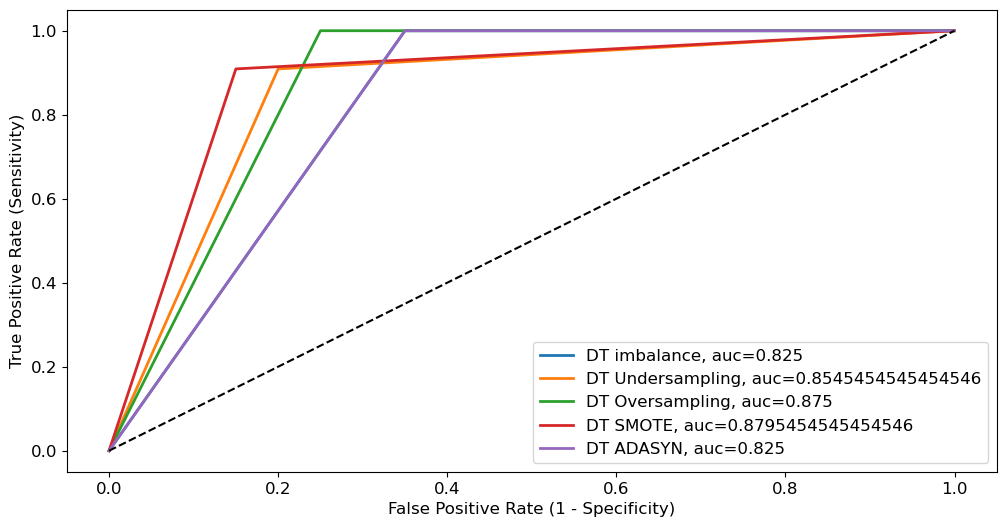

In [134]:
# Decision Tree (DT)
DTmodels = []

dt = DecisionTreeClassifier()

DTmodels.append(('DT imbalance', dt,X_train,y_train,X_test,y_test))
DTmodels.append(('DT Undersampling', dt,X_train_rus,y_train_rus,X_test,y_test))
DTmodels.append(('DT Oversampling', dt,X_train_ros,y_train_ros,X_test,y_test))
DTmodels.append(('DT SMOTE', dt,X_train_smote,y_train_smote,X_test,y_test))
DTmodels.append(('DT ADASYN', dt,X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(DTmodels)

# Random Forest (RF)

Model Name : RF imbalance
Train Accuracy :0.83146
Test Accuracy :0.74194
Train AUC : 0.83333
Test AUC : 0.80000
Train Precision : 0.74576
Test Precision : 0.57895
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 0.85437
Test F1 : 0.73333
Kappa Statistic : 0.51562
Confusion Matrix : 
 [[12  8]
 [ 0 11]]


Model Name : RF Undersampling
Train Accuracy :0.90000
Test Accuracy :0.80645
Train AUC : 0.90000
Test AUC : 0.85000
Train Precision : 0.88462
Test Precision : 0.64706
Train Recall : 0.92000
Test Recall : 1.00000
Train F1 : 0.90196
Test F1 : 0.78571
Kappa Statistic : 0.62348
Confusion Matrix : 
 [[14  6]
 [ 0 11]]


Model Name : RF Oversampling
Train Accuracy :0.88889
Test Accuracy :0.80645
Train AUC : 0.88889
Test AUC : 0.85000
Train Precision : 0.83019
Test Precision : 0.64706
Train Recall : 0.97778
Test Recall : 1.00000
Train F1 : 0.89796
Test F1 : 0.78571
Kappa Statistic : 0.62348
Confusion Matrix : 
 [[14  6]
 [ 0 11]]


Model Name : RF SMOTE
Train Accuracy :0.90000
Test Acc

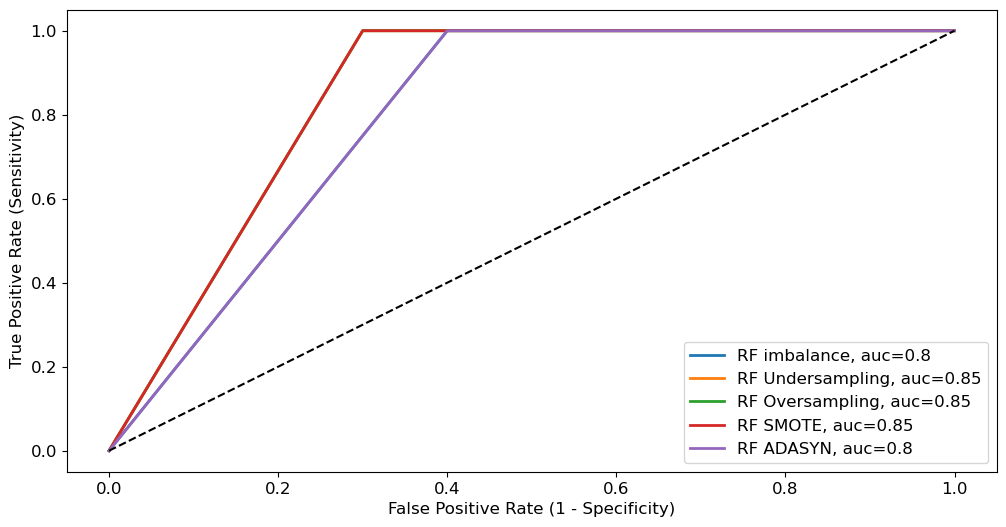

In [135]:
# Random Forest (RF) 
RFmodels = []

RFmodels.append(('RF imbalance', RandomForestClassifier(),X_train,y_train,X_test,y_test))
RFmodels.append(('RF Undersampling', RandomForestClassifier(),X_train_rus,y_train_rus,X_test,y_test))
RFmodels.append(('RF Oversampling', RandomForestClassifier(),X_train_ros,y_train_ros,X_test,y_test))
RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_train_smote,y_train_smote,X_test,y_test))
RFmodels.append(('RF ADASYN', RandomForestClassifier(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

# K-Nearest Neighbors (KNN)

Model Name : KNN imbalance
Train Accuracy :0.79775
Test Accuracy :0.83871
Train AUC : 0.79697
Test AUC : 0.85455
Train Precision : 0.84211
Test Precision : 0.71429
Train Recall : 0.72727
Test Recall : 0.90909
Train F1 : 0.78049
Test F1 : 0.80000
Kappa Statistic : 0.66809
Confusion Matrix : 
 [[16  4]
 [ 1 10]]


Model Name : KNN Undersampling
Train Accuracy :0.86000
Test Accuracy :0.90323
Train AUC : 0.86000
Test AUC : 0.88409
Train Precision : 0.95000
Test Precision : 0.90000
Train Recall : 0.76000
Test Recall : 0.81818
Train F1 : 0.84444
Test F1 : 0.85714
Kappa Statistic : 0.78422
Confusion Matrix : 
 [[19  1]
 [ 2  9]]


Model Name : KNN Oversampling
Train Accuracy :0.87778
Test Accuracy :0.83871
Train AUC : 0.87778
Test AUC : 0.85455
Train Precision : 0.86957
Test Precision : 0.71429
Train Recall : 0.88889
Test Recall : 0.90909
Train F1 : 0.87912
Test F1 : 0.80000
Kappa Statistic : 0.66809
Confusion Matrix : 
 [[16  4]
 [ 1 10]]


Model Name : KNN SMOTE
Train Accuracy :0.88889
Test

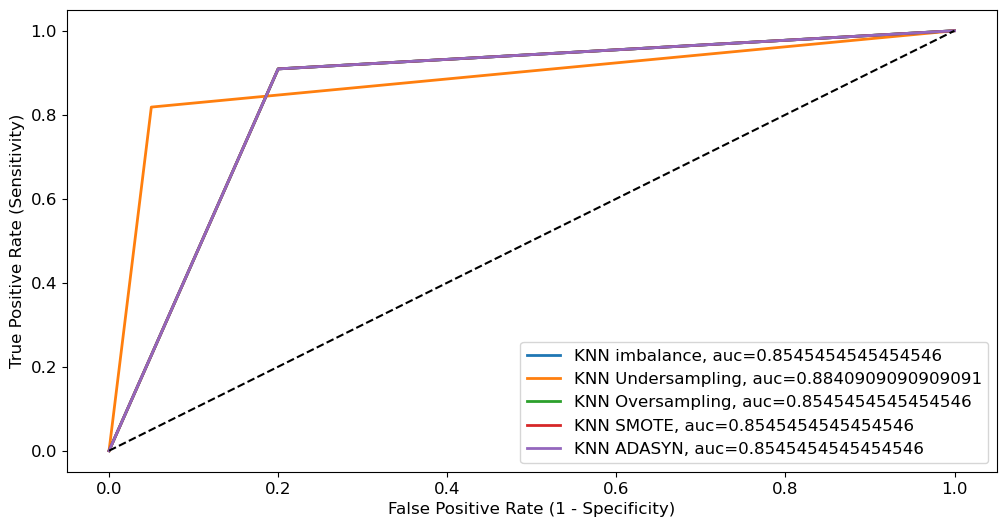

In [136]:
# K-Nearest Neighbors (KNN) 
KNNmodels = []

KNNmodels.append(('KNN imbalance', KNeighborsClassifier(),X_train,y_train,X_test,y_test))
KNNmodels.append(('KNN Undersampling', KNeighborsClassifier(),X_train_rus,y_train_rus,X_test,y_test))
KNNmodels.append(('KNN Oversampling', KNeighborsClassifier(),X_train_ros,y_train_ros,X_test,y_test))
KNNmodels.append(('KNN SMOTE', KNeighborsClassifier(),X_train_smote,y_train_smote,X_test,y_test))
KNNmodels.append(('KNN ADASYN', KNeighborsClassifier(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(KNNmodels)

# Support Vector Machines SVM

Model Name : SVM imbalance
Train Accuracy :0.83146
Test Accuracy :0.74194
Train AUC : 0.83333
Test AUC : 0.80000
Train Precision : 0.74576
Test Precision : 0.57895
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 0.85437
Test F1 : 0.73333
Kappa Statistic : 0.51562
Confusion Matrix : 
 [[12  8]
 [ 0 11]]


Model Name : SVM Undersampling
Train Accuracy :0.86000
Test Accuracy :0.74194
Train AUC : 0.86000
Test AUC : 0.80000
Train Precision : 0.78125
Test Precision : 0.57895
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 0.87719
Test F1 : 0.73333
Kappa Statistic : 0.51562
Confusion Matrix : 
 [[12  8]
 [ 0 11]]


Model Name : SVM Oversampling
Train Accuracy :0.88889
Test Accuracy :0.83871
Train AUC : 0.88889
Test AUC : 0.87500
Train Precision : 0.83019
Test Precision : 0.68750
Train Recall : 0.97778
Test Recall : 1.00000
Train F1 : 0.89796
Test F1 : 0.81481
Kappa Statistic : 0.68041
Confusion Matrix : 
 [[15  5]
 [ 0 11]]


Model Name : SVM SMOTE
Train Accuracy :0.90000
Test

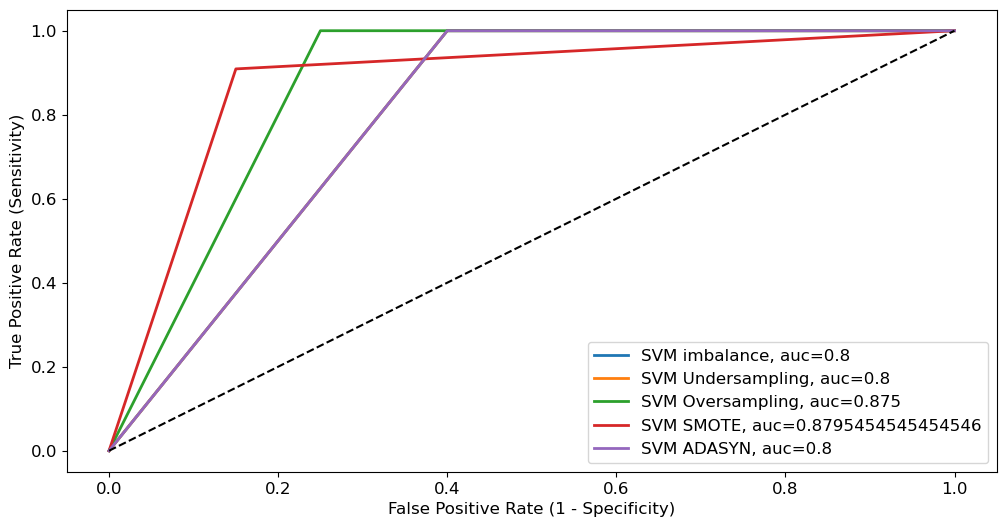

In [137]:
 # Support Vector Machines (SVM)
SVMmodels = []

SVMmodels.append(('SVM imbalance', SVC(gamma='auto'),X_train,y_train,X_test,y_test))
SVMmodels.append(('SVM Undersampling', SVC(gamma='auto'),X_train_rus,y_train_rus,X_test,y_test))
SVMmodels.append(('SVM Oversampling', SVC(gamma='auto'),X_train_ros,y_train_ros,X_test,y_test))
SVMmodels.append(('SVM SMOTE', SVC(gamma='auto'),X_train_smote,y_train_smote,X_test,y_test))
SVMmodels.append(('SVM ADASYN', SVC(gamma='auto'),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(SVMmodels)

# Gaussian Naive Bayes (NB)

Model Name : NB imbalance
Train Accuracy :0.83146
Test Accuracy :0.77419
Train AUC : 0.83333
Test AUC : 0.82500
Train Precision : 0.74576
Test Precision : 0.61111
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 0.85437
Test F1 : 0.75862
Kappa Statistic : 0.56859
Confusion Matrix : 
 [[13  7]
 [ 0 11]]


Model Name : NB Undersampling
Train Accuracy :0.86000
Test Accuracy :0.77419
Train AUC : 0.86000
Test AUC : 0.82500
Train Precision : 0.78125
Test Precision : 0.61111
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 0.87719
Test F1 : 0.75862
Kappa Statistic : 0.56859
Confusion Matrix : 
 [[13  7]
 [ 0 11]]


Model Name : NB Oversampling
Train Accuracy :0.83333
Test Accuracy :0.77419
Train AUC : 0.83333
Test AUC : 0.82500
Train Precision : 0.75000
Test Precision : 0.61111
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 0.85714
Test F1 : 0.75862
Kappa Statistic : 0.56859
Confusion Matrix : 
 [[13  7]
 [ 0 11]]


Model Name : NB SMOTE
Train Accuracy :0.83333
Test Acc

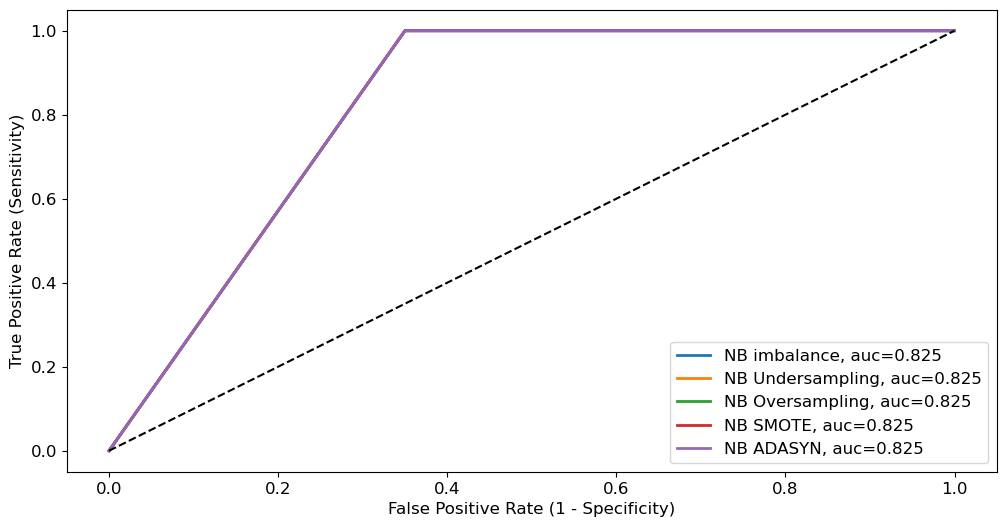

In [138]:
# Gaussian Naive Bayes (NB) 
NBmodels = []

NBmodels.append(('NB imbalance', GaussianNB(),X_train,y_train,X_test,y_test))
NBmodels.append(('NB Undersampling', GaussianNB(),X_train_rus,y_train_rus,X_test,y_test))
NBmodels.append(('NB Oversampling', GaussianNB(),X_train_ros,y_train_ros,X_test,y_test))
NBmodels.append(('NB SMOTE', GaussianNB(),X_train_smote,y_train_smote,X_test,y_test))
NBmodels.append(('NB ADASYN', GaussianNB(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(NBmodels)

# Performance measures of various classifiers

In [139]:
data = {'Model':names_lst,
       #'Accuracy_Train':accuracy_train_lst,
       'Accuracy_Test':accuracy_test_lst,
       #'AUC_Train':aucs_train_lst,
       'AUC_Test':aucs_test_lst,
       #'PrecisionScore_Train':precision_train_lst,
       'PrecisionScore_Test':precision_test_lst,
       #'RecallScore_Train':recall_train_lst,
       'RecallScore_Test':recall_test_lst,
       #'F1Score_Train':f1_train_lst,
       'F1Score_Test':f1_test_lst,
       'Kappa Stat' : kappa_lst
       }



print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data)
performance_df = performance_df.round(3)
finaltable = performance_df.sort_values(['F1Score_Test','RecallScore_Test','AUC_Test'],ascending=False)
finaltable

Performance measures of various classifiers: 



,Model,Accuracy_Test,AUC_Test,PrecisionScore_Test,RecallScore_Test,F1Score_Test,Kappa Stat
16,KNN Undersampling,0.903,0.884,0.900,0.818,0.857,0.784
0,LR imbalance,0.871,0.880,0.769,0.909,0.833,0.729
8,DT SMOTE,0.871,0.880,0.769,0.909,0.833,0.729
23,SVM SMOTE,0.871,0.880,0.769,0.909,0.833,0.729
1,LR Undersampling,0.839,0.875,0.688,1.000,0.815,0.680
2,LR Oversampling,0.839,0.875,0.688,1.000,0.815,0.680
3,LR SMOTE,0.839,0.875,0.688,1.000,0.815,0.680
7,DT Oversampling,0.839,0.875,0.688,1.000,0.815,0.680
22,SVM Oversampling,0.839,0.875,0.688,1.000,0.815,0.680
6,DT Undersampling,0.839,0.855,0.714,0.909,0.800,0.668


In [140]:
# # Export the DataFrame to an Excel file
# finaltable.to_excel('top10my_table.xlsx', index=False)

------

## Hyperparameter tuning

Hyperparameter tuning is an important step in the machine learning pipeline as it helps to find the optimal set of hyperparameters that can maximize the performance of the model. There are several ways to perform hyperparameter tuning, but the study incorporate GridsearchCV

### GridSearchCV

It takes in a model, a grid of hyperparameters, and a scoring metric, and performs a cross-validated search over the hyperparameter grid to find the best combination. The result is the best combination of hyperparameters that produces the highest score on the chose. To note that GridsearchCV can be computationally expensive, especially with large hyperparameter spaces.

In [293]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define classifiers and their parameter grids
classifiers_ = [DecisionTreeClassifier(), 
                RandomForestClassifier(), 
                SVC(), 
                GaussianNB(), 
                LogisticRegression(),
                KNeighborsClassifier()]

param_grids = [{'max_depth': range(1, 20), 'criterion': ['gini', 'entropy']},  # Decision Tree
               {'n_estimators': [50, 100, 200], 'max_depth': range(1, 10)},  # Random Forest
               {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},  # SVM
               {},  # Naive Bayes (no hyperparameters to tune)
               {'C': [0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},  # Logistic Regression
               {'n_neighbors': list(range(2, 60)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}  # KNN
              ]

# Define a list of tuples for different resampling techniques
resampling_methods = [
    ('Imbalanced', X_train, y_train),
    ('Undersampling', X_train_rus, y_train_rus),
    ('Oversampling', X_train_ros, y_train_ros),
    ('SMOTE', X_train_smote, y_train_smote),
    ('ADASYN', X_train_adasyn, y_train_adasyn)
]

# Iterate over each resampling method
for resample_name, X_train_resampled, y_train_resampled in resampling_methods:
    print(f"Results for {resample_name}:")
    
    # Iterate over each classifier and its parameter grid
    for clf, param_grid in zip(classifiers_, param_grids):
        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_resampled, y_train_resampled)
        
        # Predict on the test set
        y_pred = grid_search.predict(X_test)
        
        # Print the results
        print(f"{clf.__class__.__name__} best params: {grid_search.best_params_}, best score: {grid_search.best_score_}")
        print(f"F1 score: {f1_score(y_test, y_pred)}")
    print("\n" + "-"*50 + "\n")

Results for Imbalanced:
DecisionTreeClassifier best params: {'criterion': 'gini', 'max_depth': 1}, best score: 0.830718954248366
F1 score: 0.7586206896551725
RandomForestClassifier best params: {'max_depth': 1, 'n_estimators': 50}, best score: 0.830718954248366
F1 score: 0.7586206896551725
SVC best params: {'C': 0.1, 'kernel': 'linear'}, best score: 0.830718954248366
F1 score: 0.7333333333333334
GaussianNB best params: {}, best score: 0.830718954248366
F1 score: 0.7586206896551725
LogisticRegression best params: {'C': 0.1, 'solver': 'newton-cg'}, best score: 0.830718954248366
F1 score: 0.7586206896551725
KNeighborsClassifier best params: {'algorithm': 'auto', 'n_neighbors': 21}, best score: 0.830718954248366
F1 score: 0.7096774193548387

--------------------------------------------------

Results for Undersampling:
DecisionTreeClassifier best params: {'criterion': 'gini', 'max_depth': 2}, best score: 0.8800000000000001
F1 score: 0.8333333333333333
RandomForestClassifier best params: {'

| Model                    | Imbalanced Parameters                             | Undersampling Parameters                        | Oversampling Parameters                           | SMOTE Parameters                                      | ADASYN Parameters                                     |
|--------------------------|--------------------------------------------------|-------------------------------------------------|--------------------------------------------------|------------------------------------------------------|-------------------------------------------------------|
| **DecisionTreeClassifier** | `criterion='gini', max_depth=1`                  | `criterion='gini', max_depth=2`                  | `criterion='gini', max_depth=3`                   | `criterion='gini', max_depth=4`                        | `criterion='gini', max_depth=1`                        |
| **RandomForestClassifier** | `max_depth=1, n_estimators=50`                  | `max_depth=3, n_estimators=100`                  | `max_depth=3, n_estimators=50`                    | `max_depth=2, n_estimators=50`                         | `max_depth=1, n_estimators=50`                         |
| **SVC**                   | `C=0.1, kernel='linear'`                         | `C=1, kernel='linear'`                           | `C=10, kernel='linear'`                           | `C=1, kernel='linear'`                                 | `C=0.1, kernel='linear'`                               |
| **GaussianNB**            | `{}` (default parameters)                        | `{}` (default parameters)                        | `{}` (default parameters)                         | `{}` (default parameters)                             | `{}` (default parameters)                              |
| **LogisticRegression**    | `C=0.1, solver='newton-cg'`                      | `C=10, solver='saga'`                            | `C=1, solver='newton-cg'`                         | `C=1, solver='newton-cg'`                              | `C=0.1, solver='newton-cg'`                            |
| **KNeighborsClassifier**  | `algorithm='auto', n_neighbors=21`               | `algorithm='auto', n_neighbors=7`                | `algorithm='auto', n_neighbors=9`                 | `algorithm='brute', n_neighbors=14`                    | `algorithm='auto', n_neighbors=21`                     |


* Based  on the hyper parameter tuning, Logistic Regression with Undersampling or SMOTE seems to be the best choice given its high best score and consistent F1 score across different methods.

So the final product will be developed using SMOTE

----

# Cross validation



In [304]:
# the classifiers
classifiers_ = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(gamma='auto'),
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

# undersampling techniques
undersampling_techniques_ = {
    'Undersampling': RandomUnderSampler(random_state=42),
}

# oversampling techniques
oversampling_techniques_ = {
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'RandomOverSampler': RandomOverSampler(random_state=42)
}

# Performing cross-validation for each classifier with each combination of undersampling and oversampling techniques
for clf_name, clf in classifiers_.items():
    for under_name, under_sampler in undersampling_techniques_.items():
        for over_name, over_sampler in oversampling_techniques_.items():
            pipeline = Pipeline([
                ('undersample', under_sampler),
                ('oversample', over_sampler),
                ('model', clf)
            ])
            scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
            print(f"{clf_name} with {under_name} and {over_name} mean accuracy: {scores.mean():.4f} ± {scores.std():.4f}")
            
# Performing cross-validation for each classifier with each oversampling technique alone
for clf_name, clf in classifiers_.items():
    for over_name, over_sampler in oversampling_techniques_.items():
        pipeline = Pipeline([
            ('oversample', over_sampler),
            ('model', clf)
        ])
        scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
        print(f"{clf_name} with {over_name} mean accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

DecisionTreeClassifier with Undersampling and SMOTE mean accuracy: 0.7633 ± 0.0609
DecisionTreeClassifier with Undersampling and ADASYN mean accuracy: 0.7729 ± 0.0473
DecisionTreeClassifier with Undersampling and RandomOverSampler mean accuracy: 0.7729 ± 0.0473
RandomForestClassifier with Undersampling and SMOTE mean accuracy: 0.7729 ± 0.0473
RandomForestClassifier with Undersampling and ADASYN mean accuracy: 0.7729 ± 0.0473
RandomForestClassifier with Undersampling and RandomOverSampler mean accuracy: 0.7729 ± 0.0473
SVC with Undersampling and SMOTE mean accuracy: 0.7729 ± 0.0473
SVC with Undersampling and ADASYN mean accuracy: 0.7729 ± 0.0473
SVC with Undersampling and RandomOverSampler mean accuracy: 0.7729 ± 0.0473
GaussianNB with Undersampling and SMOTE mean accuracy: 0.7824 ± 0.0590
GaussianNB with Undersampling and ADASYN mean accuracy: 0.7824 ± 0.0590
GaussianNB with Undersampling and RandomOverSampler mean accuracy: 0.7824 ± 0.0590
LogisticRegression with Undersampling and SMO

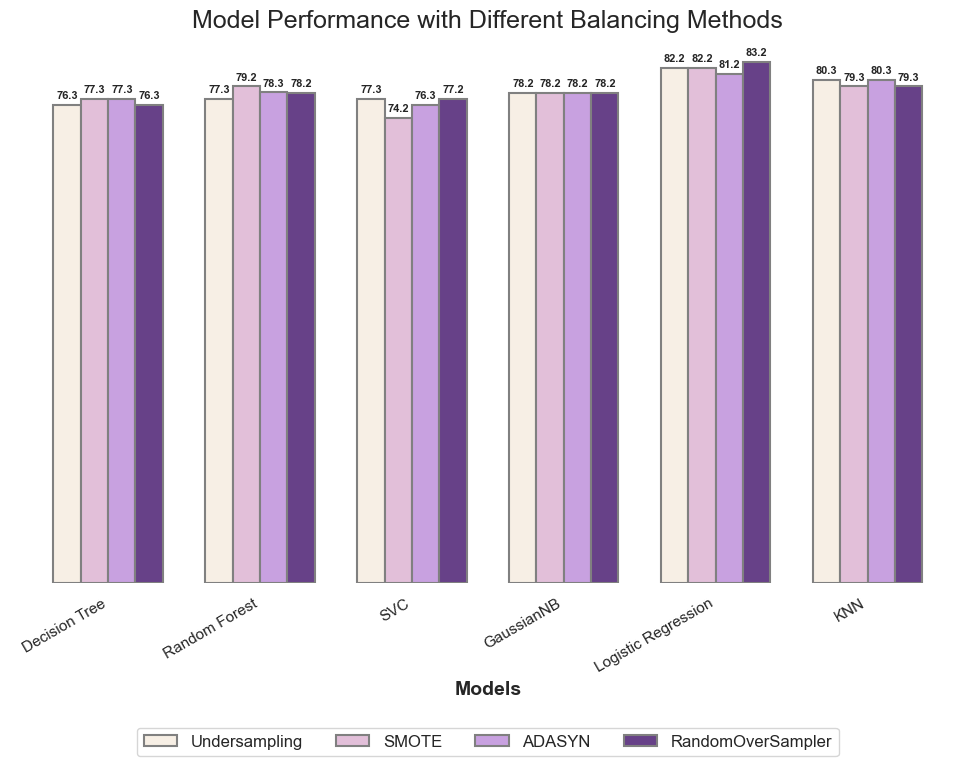

In [342]:
# Define the labels, scores, and colors for each balancing method
models = ['Decision Tree', 'Random Forest', 'SVC', 'GaussianNB', 'Logistic Regression', 'KNN']
undersampling_scores = [0.7633, 0.7729, 0.7729, 0.7824, 0.8224, 0.8029]
smote_scores = [0.7729, 0.7924, 0.7424, 0.7824, 0.8224, 0.7929]
adasyn_scores = [0.7729, 0.7829, 0.7629, 0.7824, 0.8124, 0.8029]
random_over_sampler_scores = [0.7629, 0.7824, 0.7724, 0.7824, 0.8319, 0.7929]

# Define subtle colors
colors_undersampling = '#F7EFE5'  # Light teal
colors_smote = '#E2BFD9'  # Light brown
colors_adasyn = '#C8A1E0'  # Light purple
colors_random_over_sampler = '#674188'  # Light blue

# Set up the plot
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 8))  # Adjusted figure size for better proportions

# Bar width and positions with optimized spacing
width = 0.18  # Slightly narrower bar width
x = np.arange(len(models))  # Simplified positions for better alignment

# Plot each method with optimized spacing between bars within a group
bars_undersampling = ax.bar(x - width * 1.5, undersampling_scores, width, label='Undersampling', color=colors_undersampling, edgecolor='grey', linewidth=1.5)
bars_smote = ax.bar(x - width / 2, smote_scores, width, label='SMOTE', color=colors_smote, edgecolor='grey', linewidth=1.5)
bars_adasyn = ax.bar(x + width / 2, adasyn_scores, width, label='ADASYN', color=colors_adasyn, edgecolor='grey', linewidth=1.5)
bars_random_over_sampler = ax.bar(x + width * 1.5, random_over_sampler_scores, width, label='RandomOverSampler', color=colors_random_over_sampler, edgecolor='grey', linewidth=1.5)

# Set labels and title
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_title('Model Performance with Different Balancing Methods', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30, ha='right')

# Add accuracy score text on bars with reduced font size
for bars in [bars_undersampling, bars_smote, bars_adasyn, bars_random_over_sampler]:
    for bar in bars:
        yval = bar.get_height()
        # Adjust the position of the text slightly above the bar and reduce the font size
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval * 100:.1f}', fontsize=8, ha='center', fontweight='bold')

# Place the legend below the plot with extra spacing
ax.legend( title_fontsize='14', fontsize='12', loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4)

# Remove y-axis labels and ticks
ax.yaxis.set_visible(False)

# Add a subtle grid for better readability
ax.grid(False)  # Turn off the y-axis grid

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)


plt.savefig("Model Performance with Different Balancing Method.png")
# Display the plot
plt.tight_layout()
plt.show()


The LogisticRegression with Undersampling and RandomOverSampler is the overall best model, offering the highest mean accuracy (0.8319) and low standard deviation (± 0.0387), making it the most accurate and stable choice.


If you prefer more simplicity in handling imbalanced data, LogisticRegression with Undersampling and SMOTE/ADASYN are strong alternatives

# Accuracy of each model

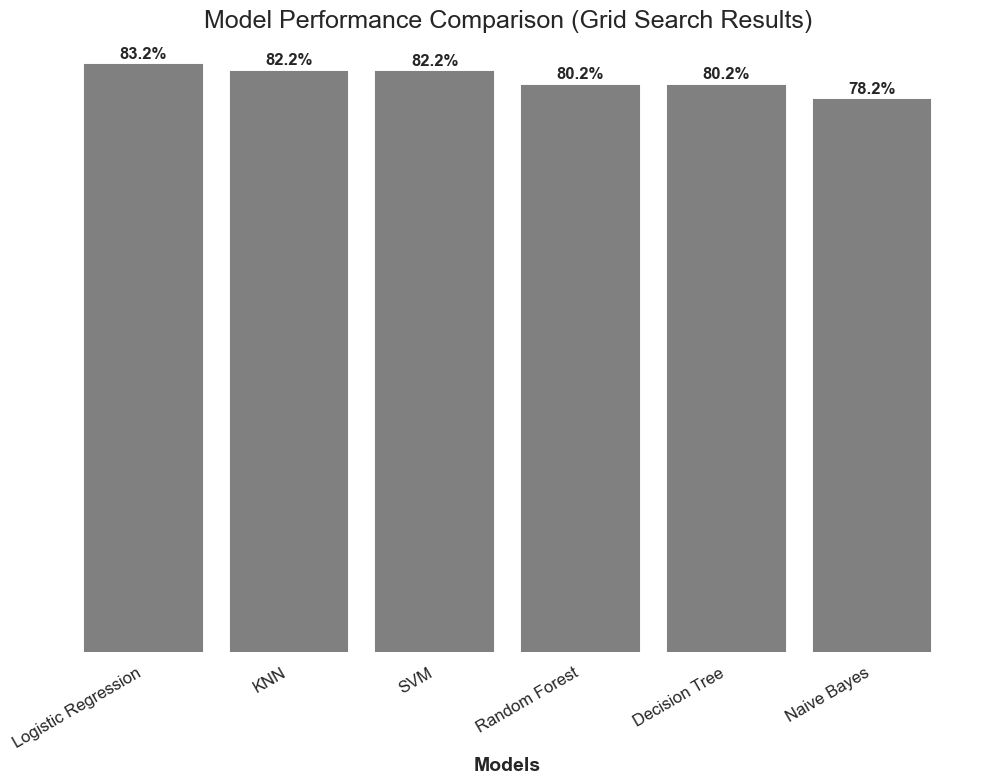

In [388]:

labels = ['Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'Logistic Regression', 'KNN']
scores = [0.8024, 0.8024, 0.8219, 0.7824, 0.8319, 0.8224]
colors = ['#808080'] * len(labels)  # All grey bars

# Sort the scores and labels in descending order
sorted_scores, sorted_labels = zip(*sorted(zip(scores, labels), reverse=True))

# Set up the plot
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

# Create bar plot
bars = ax.bar(sorted_labels, sorted_scores, color=colors, edgecolor='grey', linewidth=1.5)

# Set the title and axis labels
ax.set_title('Model Performance Comparison (Grid Search Results)', fontsize=18)
ax.set_xlabel('Models', fontsize=14, fontweight='bold')

# Add the accuracy score as text above each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval * 100:.1f}%', fontsize=12, ha='center', fontweight='bold')

# Set tick parameters and rotate x-labels for better readability
ax.tick_params(axis='x', which='major', labelsize=12)
ax.set_xticklabels(sorted_labels, rotation=30, ha='right')

# Remove y-axis labels, grid, and spines
ax.yaxis.set_visible(False)
ax.grid(False)  # Removes both x and y grid lines

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)


plt.savefig("model performanec.png")
# Display the plot
plt.show()

# Encoded 

* Family Abroad: {'Yes': 0, 'No': 1}
* Target Study Abroad Country: {nan: 0, 'Canada': 1, 'New Zealand': 2, 'United Kingdom': 3, 'Australia': 4, 'United States': 5, 'Russian Federation': 6, 'Cameroon': 7, 'Finland': 8, 'India': 9, 'Switzerland': 10}
    Study Subject Abroad: {nan: 0, 'Business and Economics': 1, 'Humanities (Languages, Literature, History, Philosophy)': 2, 'STEM (Science, Technology, Engineering, Mathematics)': 3, 'Arts and Design': 4, 'Social Sciences (Psychology ,Sociology, Political Science)': 5}
    
* Part-Time Work?: {'Yes': 0, 'No': 1}
    
* Environmental Factors: {'Option A': 0, 'Option B': 1}

>  As we have done hyper parameter tuning and Cross Validation training model with best parameter

# Final T/T on best model and exporting as pickle file 

In [144]:
X_train_smote.columns


Index(['Target Study Abroad Country', 'Family Abroad', 'Study Subject Abroad',
       'Part-Time Work?', 'Environmental Factors'],
      dtype='object')

In [142]:
# SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the Logistic Regression model using the specified hyperparameters
logreg = LogisticRegression(C=1, solver='newton-cg', random_state=42)
logreg.fit(X_train_smote, y_train_smote)

# Export the trained model
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(logreg, model_file)


In [143]:
# Load the trained model
with open('logistic_regression_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Define test data
test_data = [
    {
        'Target Study Abroad Country': 0,  # Canada
        'Family Abroad': 0,                # No
        'Study Subject Abroad': 2,         # STEM
        'Part-Time Work?': 0,              # Yes
        'Environmental Factors': 1         # Option A
    },
    {
        'Target Study Abroad Country': 3,  # United Kingdom
        'Family Abroad': 0,                # Yes
        'Study Subject Abroad': 2,         # Humanities
        'Part-Time Work?': 1,              # No
        'Environmental Factors': 1         # Option B
    },
    {
        'Target Study Abroad Country': 4,  # Australia
        'Family Abroad': 1,                # No
        'Study Subject Abroad': 1,         # Business and Economics
        'Part-Time Work?': 0,              # Yes
        'Environmental Factors': 0         # Option A
    }
]

# Convert test data to DataFrame
test_df = pd.DataFrame(test_data)

# Make predictions using the loaded model
predictions = loaded_model.predict(test_df)
probabilities = loaded_model.predict_proba(test_df)

# Print results
print('Predictions:', predictions)
print('Probabilities:', probabilities)

Predictions: [0 0 0]
Probabilities: [[0.60961152 0.39038848]
 [0.96044634 0.03955366]
 [0.96298201 0.03701799]]


# Findings

The goal was to identify the most effective machine learning model and resampling strategy for predicting whether Nepali students will plan to study abroad. The selected features include:

* Target Study Abroad Country
* Family Abroad
* Study Subject Abroad
* Part-Time Work?
* Environmental Factors


* Logistic Regression performed the best overall, especially when combined with SMOTE for handling imbalanced data. The optimal hyperparameters for Logistic Regression were:

    * C = 1
    * solver = 'newton-cg'

This combination achieved:

    * Best Score (Cross-Validation Accuracy): 0.8889
    * F1 Score: 0.8148
    * SMOTE proved to be an effective resampling technique, balancing the dataset while maintaining performance across different models.

The top-performing models based on overall accuracy, stability, and interpretability were:

* Logistic Regression with SMOTE
* Random Forest with SMOTE
* K-Nearest Neighbors with SMOTE


----------